## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [4]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  2995k      0 --:--:--  0:05:00 --:--:-- 2857k


In [5]:
!rm SUSY.csv

In [6]:
!gunzip SUSY.csv.gz

In [7]:
!ls -lh

total 5161216
-rw-r--r--@ 1 ivysanchez  staff   5.8M Mar 19 17:22 Lab.7.pdf
-rw-r--r--  1 ivysanchez  staff    51K Mar 31 04:00 Lab.7.solution-revised-final.ipynb
-rw-r--r--  1 ivysanchez  staff   1.5M Mar 22 00:49 Lab.7.solution.ipynb
-rw-r--r--  1 ivysanchez  staff   228M Mar 31 03:24 SUSY-small.csv
-rw-r--r--  1 ivysanchez  staff   2.2G Mar 31 04:01 SUSY.csv


We see that we have 5 million datapoints.

In [8]:
!wc -l SUSY.csv

 5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [9]:
!head -500000 SUSY.csv > SUSY-small.csv

In [10]:
ls -lh

total 5186008
-rw-r--r--@ 1 ivysanchez  staff   5.8M Mar 19 17:22 Lab.7.pdf
-rw-r--r--  1 ivysanchez  staff    51K Mar 31 04:00 Lab.7.solution-revised-final.ipynb
-rw-r--r--  1 ivysanchez  staff   1.5M Mar 22 00:49 Lab.7.solution.ipynb
-rw-r--r--  1 ivysanchez  staff   228M Mar 31 04:01 SUSY-small.csv
-rw-r--r--  1 ivysanchez  staff   2.2G Mar 31 04:01 SUSY.csv


In [11]:
! wc -l SUSY-small.csv

  500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [12]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [13]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [14]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [15]:
FeatureNames

['M_R',
 'M_TR_2',
 'axial_MET',
 'MET_rel',
 'M_Delta_R',
 'dPhi_r_b',
 'S_R',
 'cos_theta_r1',
 'MT2',
 'R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [16]:
!pip install --user pandas
import sys
print(sys.executable)

%pip install pandas

/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [18]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [19]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [20]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


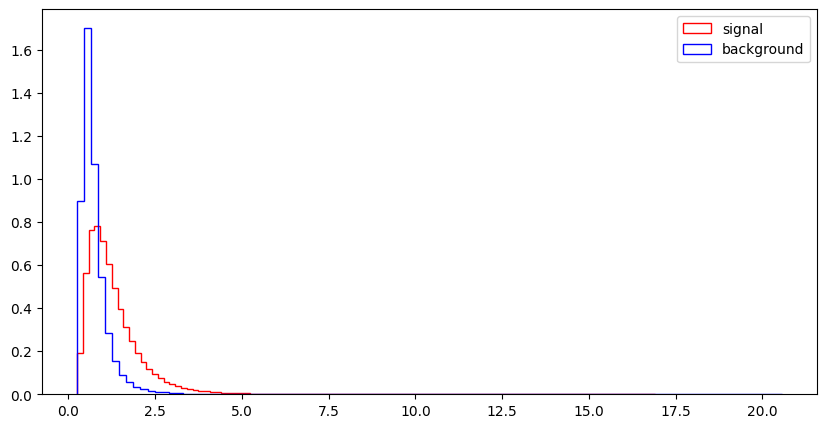

l_1_eta


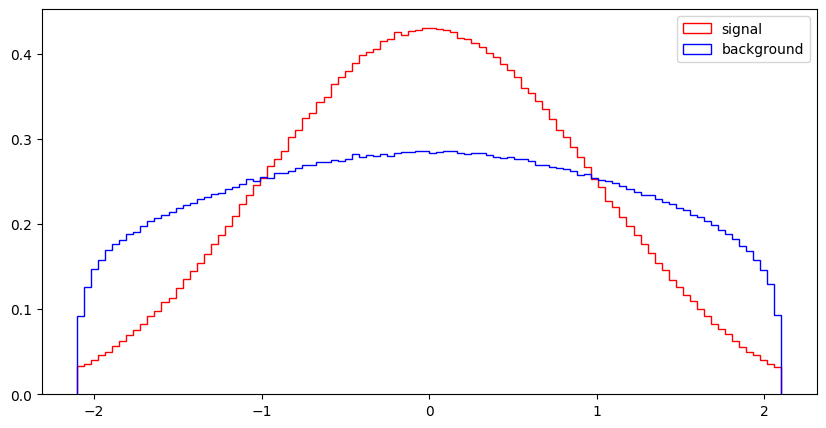

l_1_phi


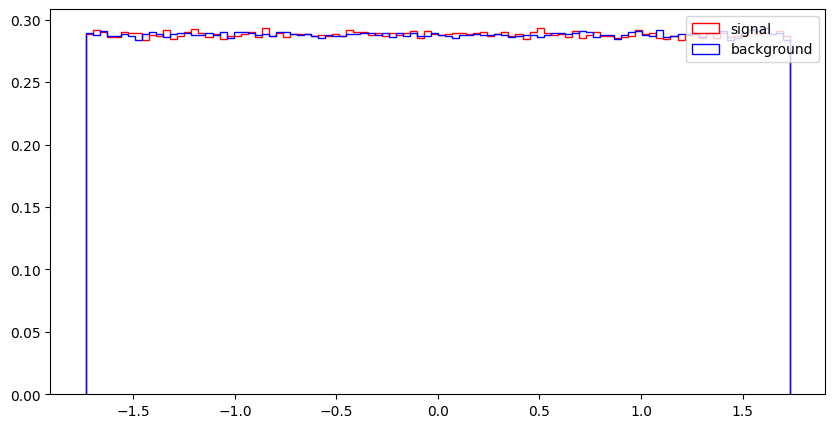

l_2_pT


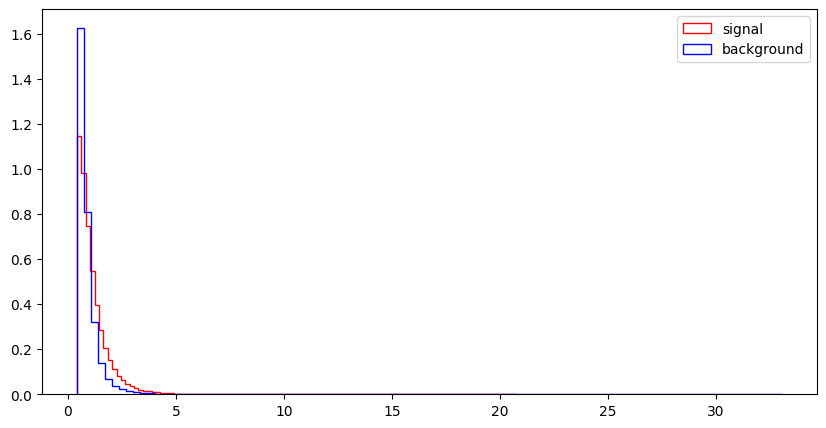

l_2_eta


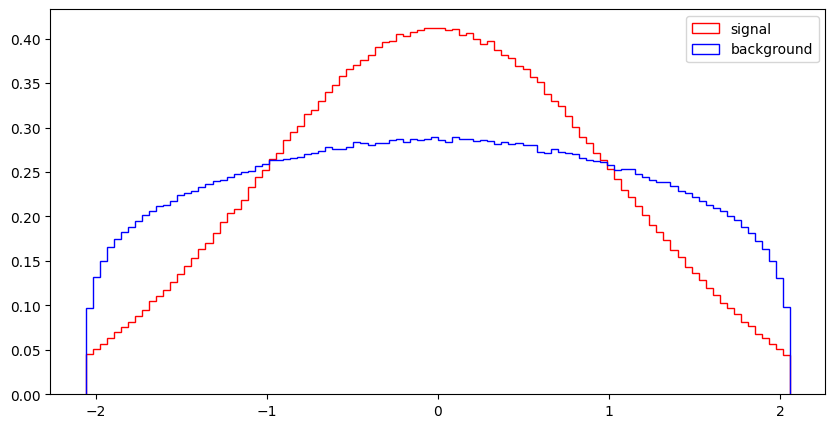

l_2_phi


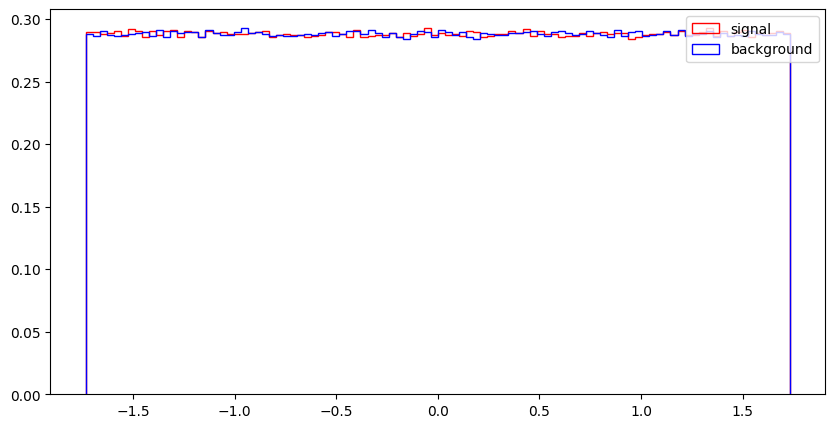

MET


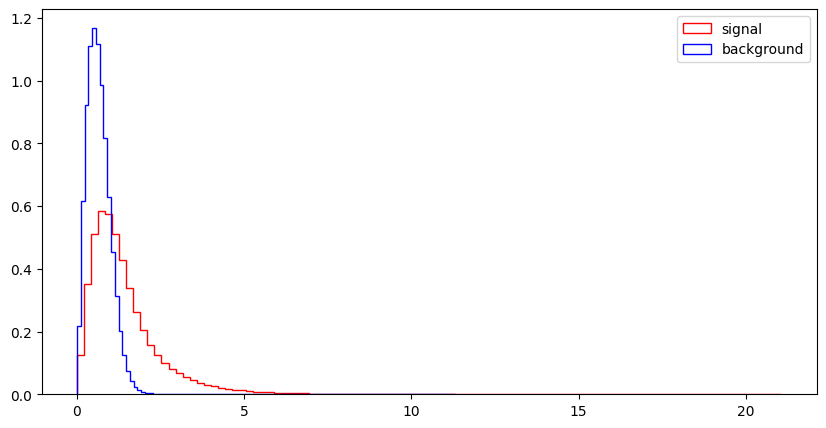

MET_phi


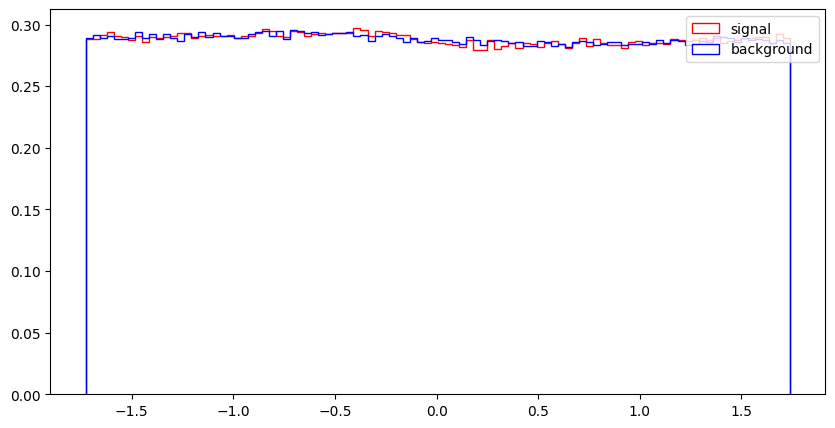

MET_rel


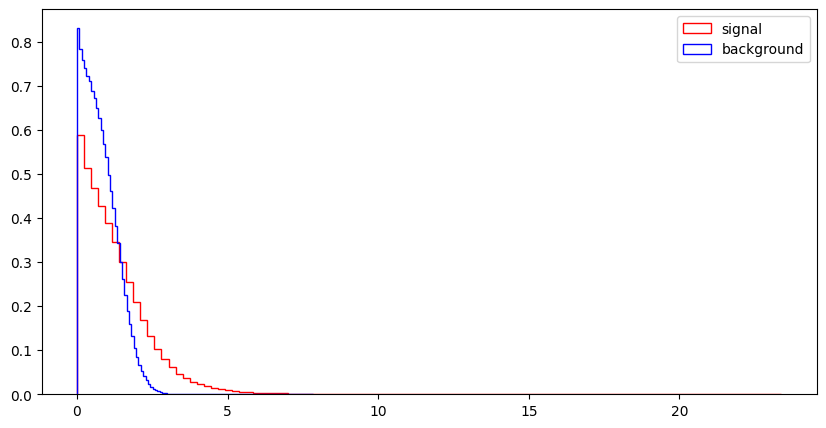

axial_MET


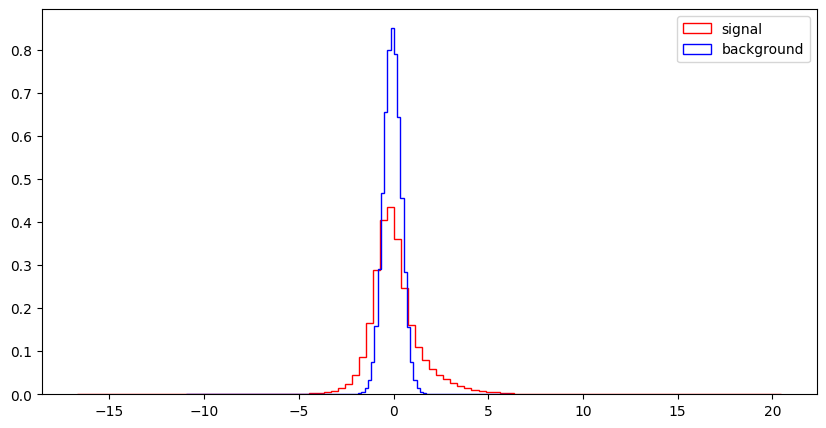

M_R


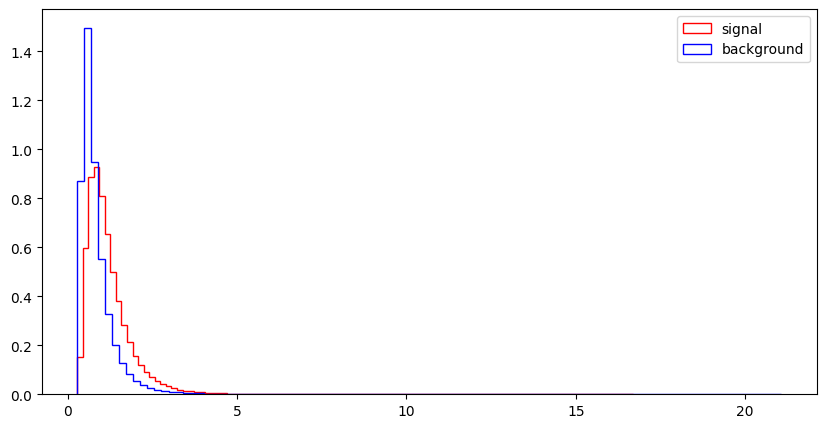

M_TR_2


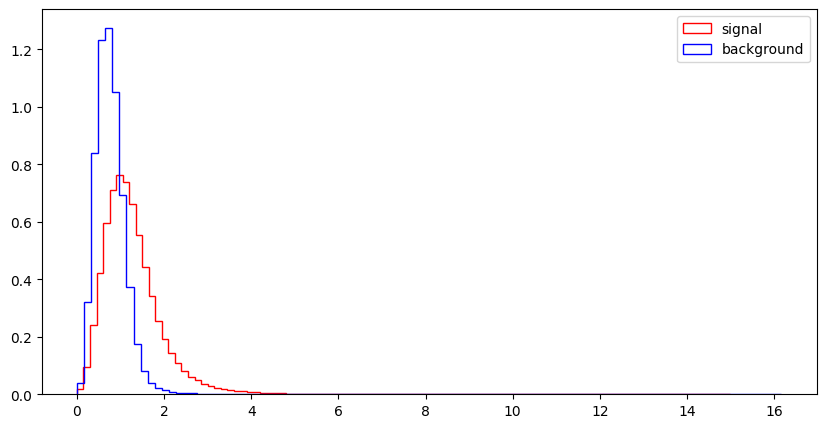

R


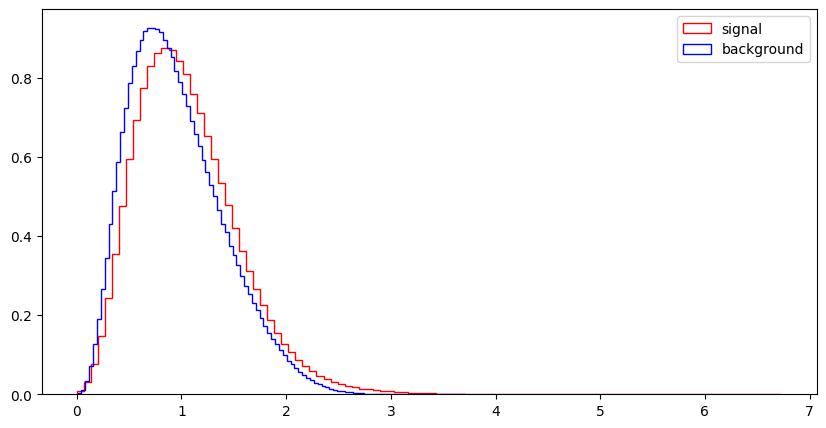

MT2


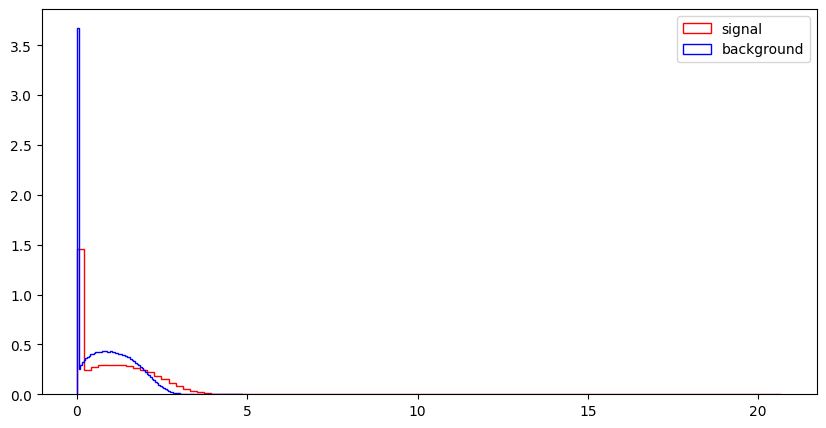

S_R


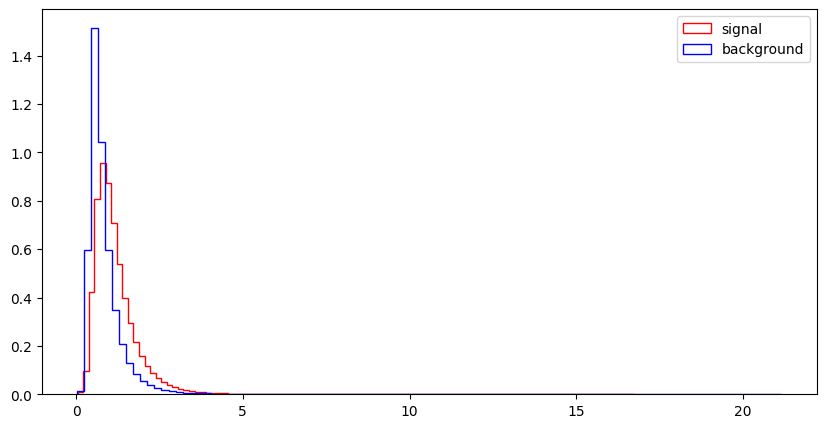

M_Delta_R


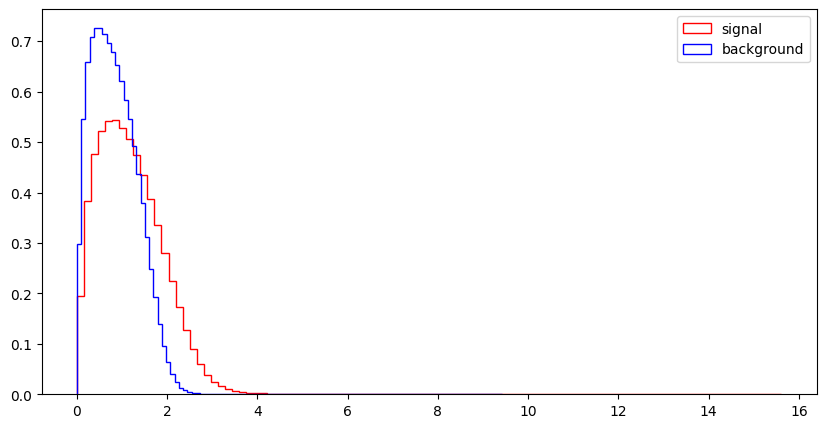

dPhi_r_b


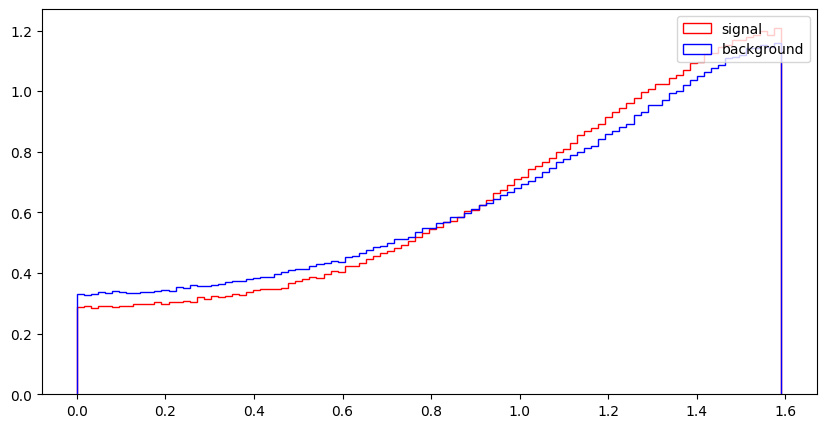

cos_theta_r1


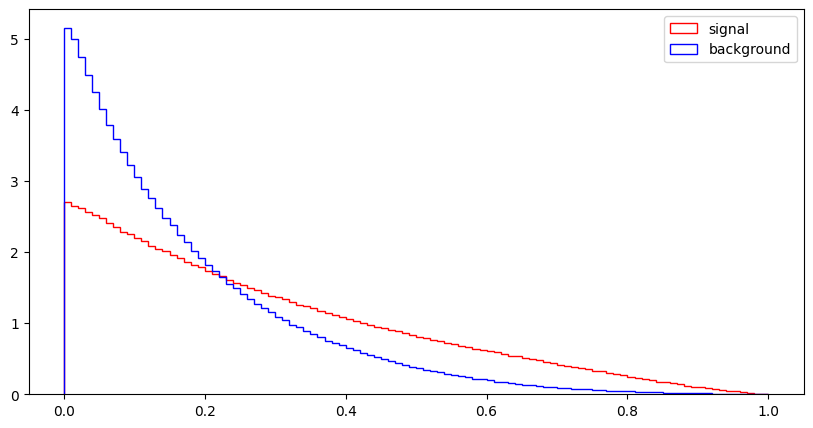

In [21]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

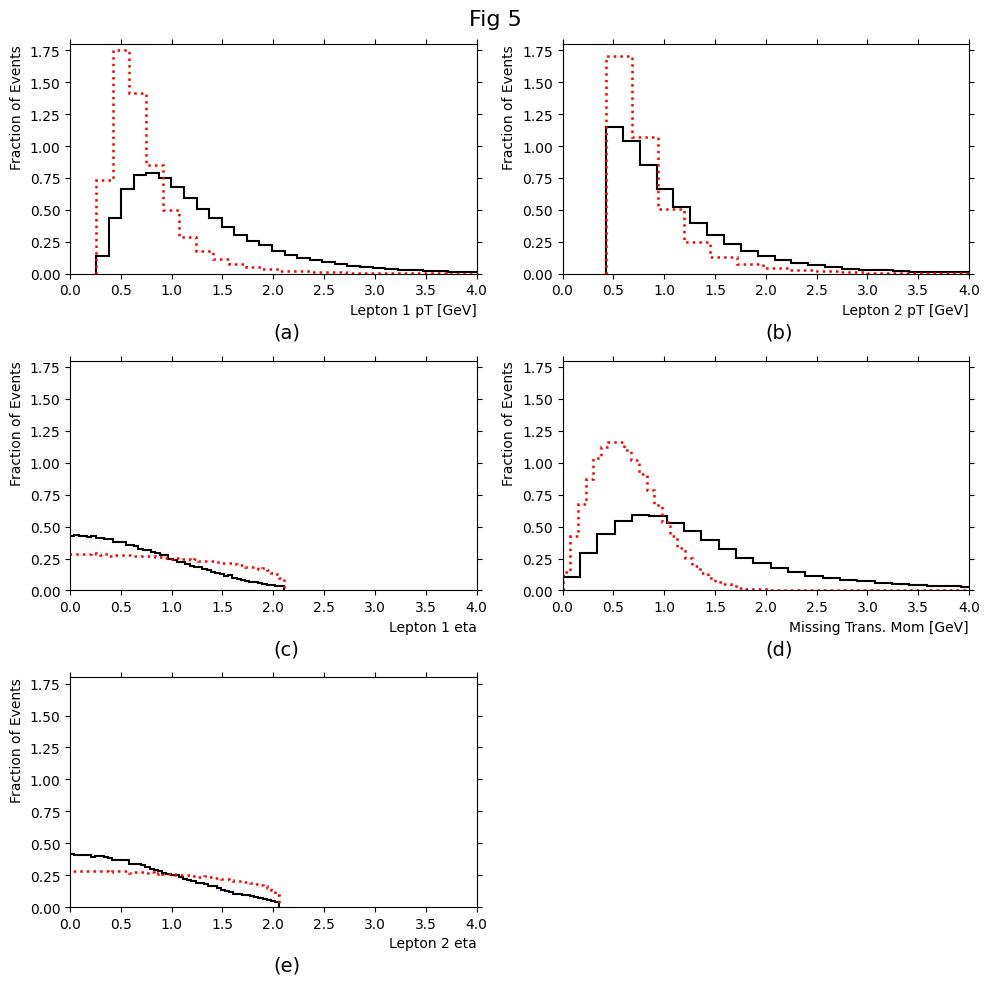

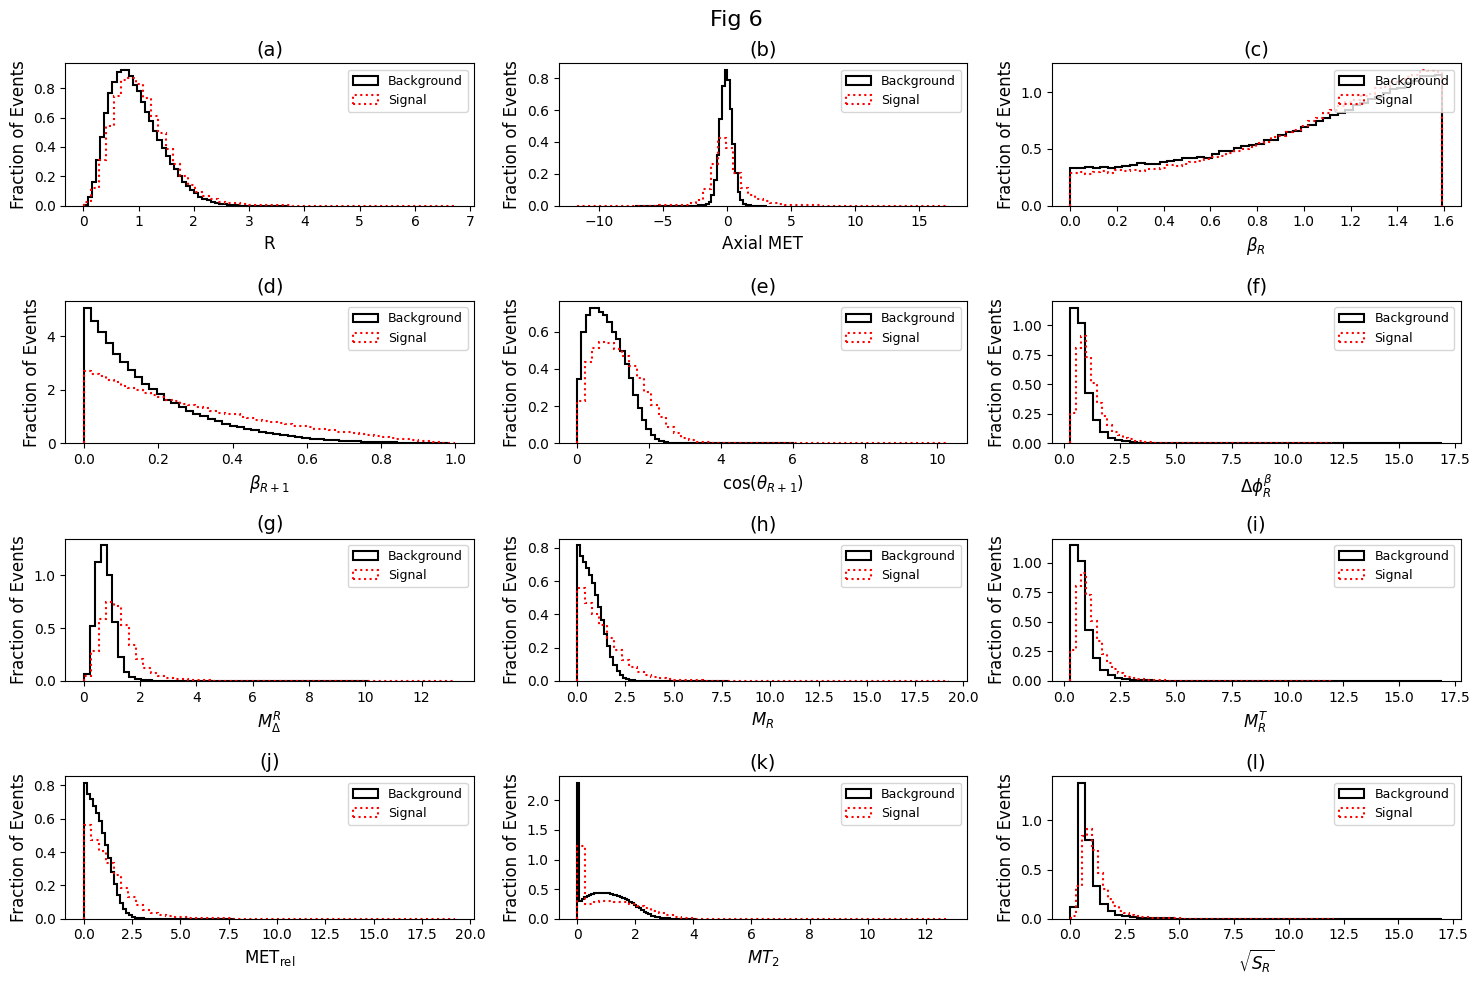

In [22]:
# Exercise 3 - Recreate Figures 5 and 6
import matplotlib.pyplot as plt
import numpy as np

filename = "SUSY-small.csv"
VarNames = [
    "signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
    "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2",
    "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"
]
df = pd.read_csv(filename, dtype='float64', names=VarNames)
df_sig = df[df.signal == 1]
df_bkg = df[df.signal == 0]

# FIG. 5: Low-level input features for SUSY benchmark
cols = ["l_1_pT", "l_2_pT", "l_1_eta", "MET", "l_2_eta"]  # low level features, corrected column names
f5_vars = ["Lepton 1 pT [GeV]", "Lepton 2 pT [GeV]", "Lepton 1 eta", "Missing Trans. Mom [GeV]", "Lepton 2 eta"]  # axis names from paper
f5_titles = [f"({chr(97 + i)})" for i in range(len(f5_vars))]

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(cols):
    axes[i].hist(np.array(df_sig[col]), bins=100, histtype="step", linewidth=1.5,
                 color="black", label="signal", density=1, stacked=True)
    axes[i].hist(np.array(df_bkg[col]), bins=100, histtype="step", linestyle=":",
                 linewidth=1.8, color="red", label="background", density=1, stacked=True)
    axes[i].set_ylabel("Fraction of Events", loc="top")
    axes[i].set_xlabel(f5_vars[i], loc="right")
    axes[i].tick_params(top=True, right=True)
    axes[i].text(2, -0.5, f5_titles[i], fontsize=14)
    axes[i].set_xlim(0, 4)
    axes[i].set_ylim(0, 1.8)
if len(cols) < len(axes):
    fig.delaxes(axes[-1])
plt.suptitle("Fig 5", fontsize=16)
plt.tight_layout()
plt.show()


# FIG. 6: High-level input features for SUSY benchmark
f6_vars = [
    "R", "axial_MET", "dPhi_r_b", "cos_theta_r1",
    "M_Delta_R", "M_R", "M_TR_2", "MET_rel",
    "M_R", "MET_rel", "MT2", "S_R"
]

f6_labels = [
    "R", "Axial MET", r"$\beta_R$", r"$\beta_{R+1}$",
    r"$\cos(\theta_{R+1})$", r"$\Delta \phi^{\beta}_R$", r"$M^R_{\Delta}$", r"$M_R$",
    r"$M^{T}_R$", r"$\mathrm{MET_{rel}}$", r"$MT_2$", r"$\sqrt{S_R}$"
]

f6_titles = [f"({chr(97+i)})" for i in range(len(f6_vars))]

fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(f6_vars):
    axes[i].hist(df_bkg[var], bins=50, density=True, histtype='step', color='black', linewidth=1.5, label='Background')
    axes[i].hist(df_sig[var], bins=50, density=True, histtype='step', linestyle='dotted', color='red', linewidth=1.5, label='Signal')
    axes[i].set_title(f6_titles[i], fontsize=14)
    axes[i].set_xlabel(f6_labels[i], fontsize=12)
    axes[i].set_ylabel("Fraction of Events", fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)
    axes[i].legend(fontsize=9, loc='upper right')
for j in range(len(f6_vars), len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Fig 6", fontsize=16)
plt.tight_layout()
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

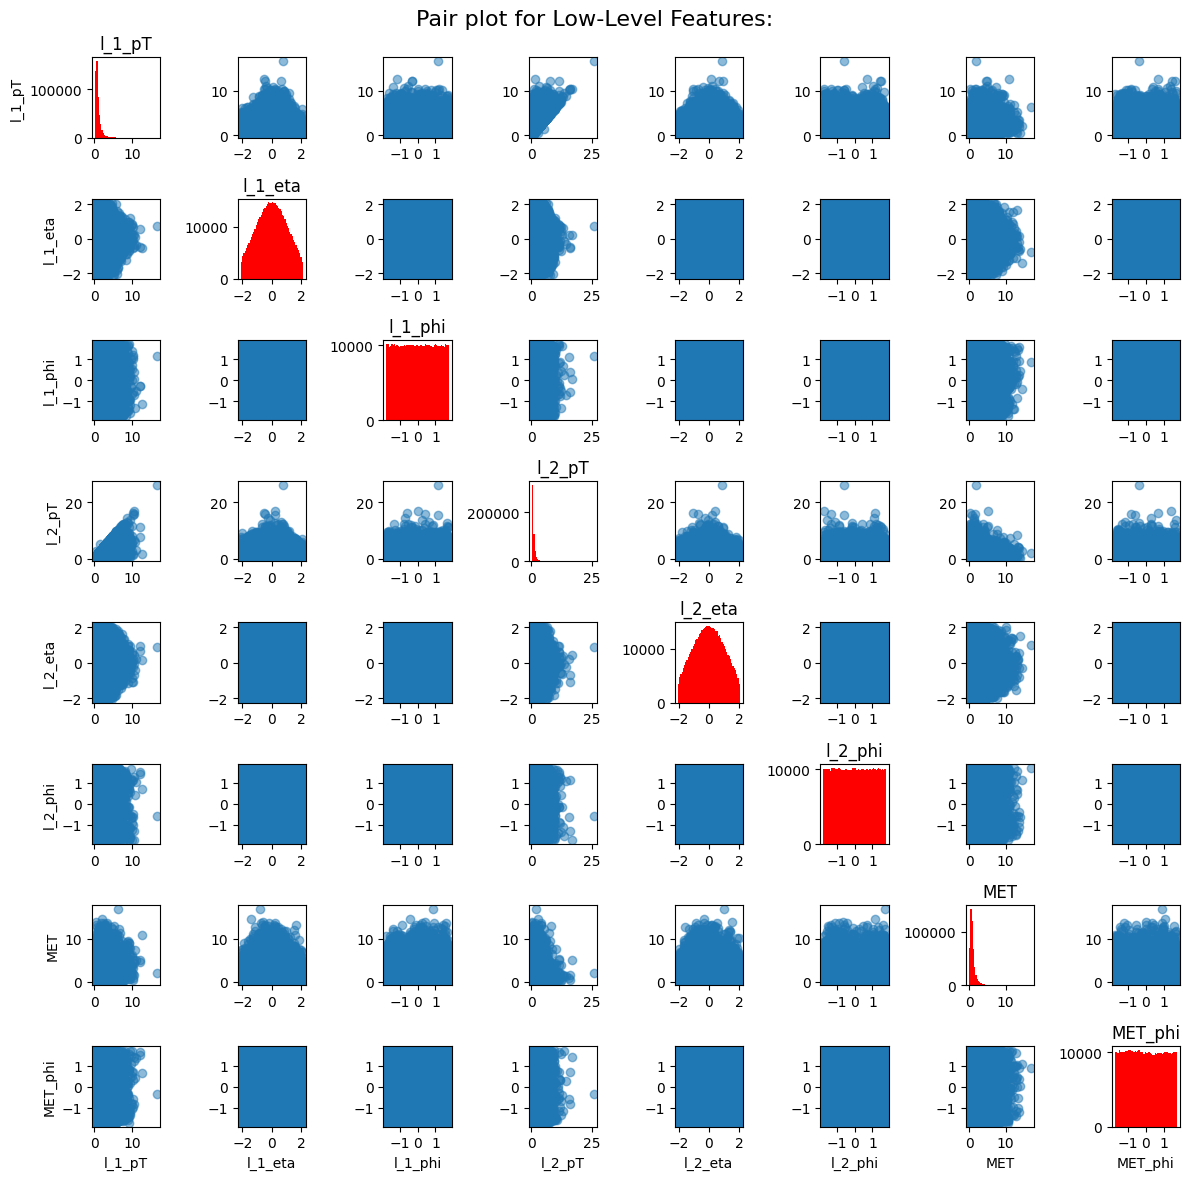

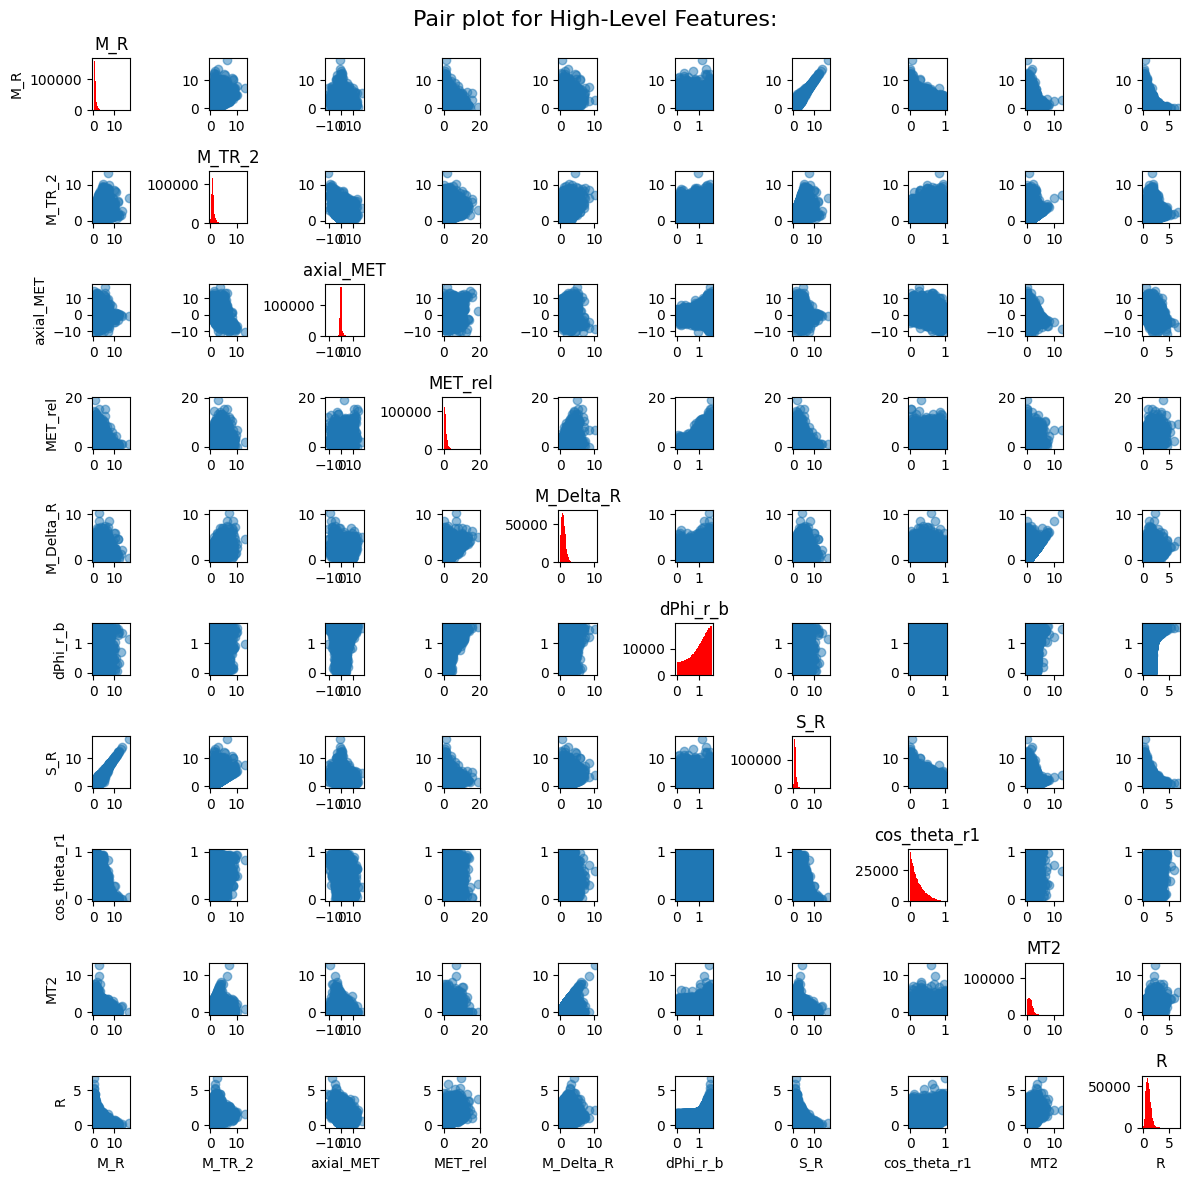

In [23]:
# Part a: create pair plots

def create_pair_plots(df, variables, title):
    num_vars = len(variables)
    fig, axes = plt.subplots(num_vars, num_vars, figsize=(12, 12))

    data = [df[var].values for var in variables] 

    for i in range(num_vars):
        for j in range(num_vars):
            if i == j:
                # Diagonal: Histogram
                axes[i, j].hist(data[i], bins=50, color="red")
                axes[i, j].set_title(variables[i])
            else:
                # Off-diagonal: Scatter plot
                axes[i, j].scatter(data[j], data[i], alpha=0.5)
            # axis labels
            if i == num_vars - 1:
                axes[i, j].set_xlabel(variables[j])
            if j == 0:
                axes[i, j].set_ylabel(variables[i])

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()
    
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"] 

create_pair_plots(df, RawNames,"Pair plot for Low-Level Features:")
create_pair_plots(df, FeatureNames, "Pair plot for High-Level Features:")

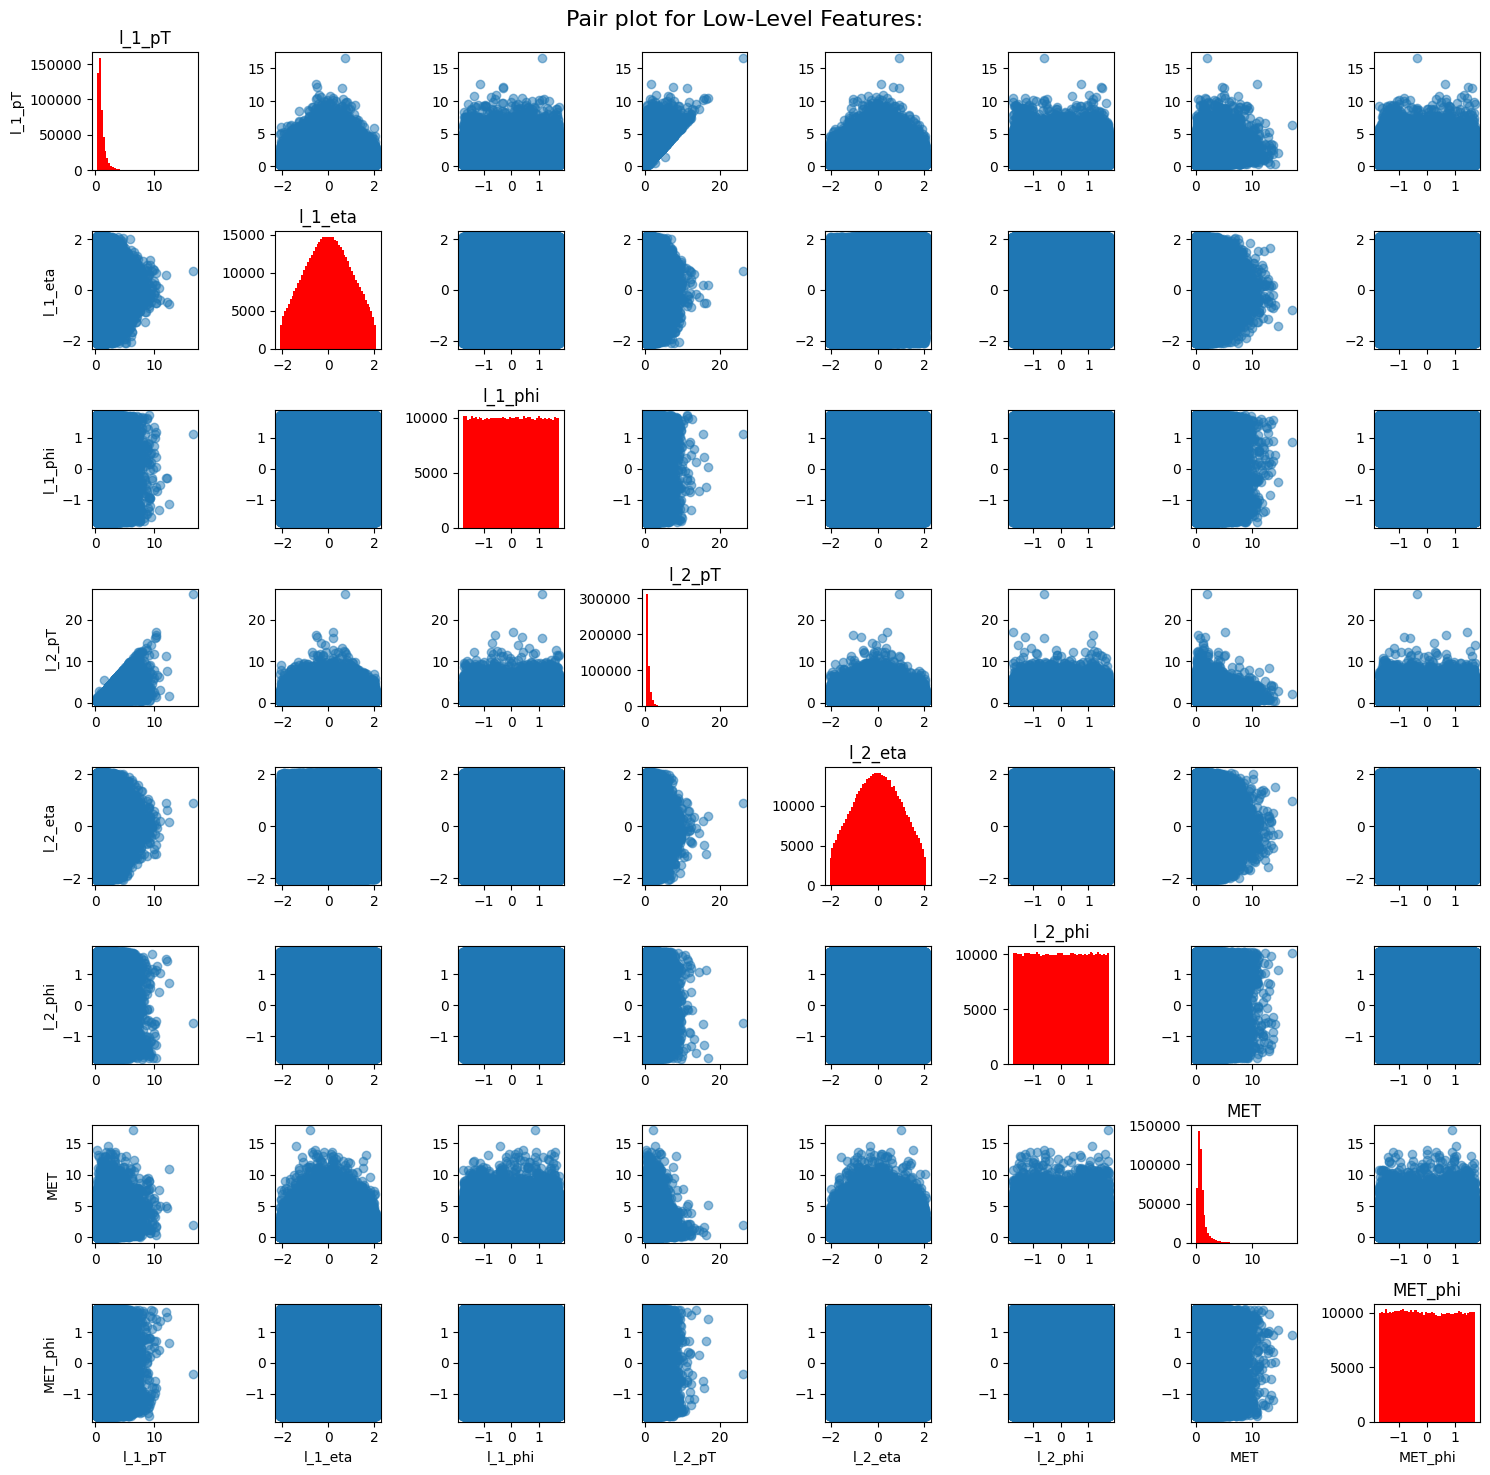

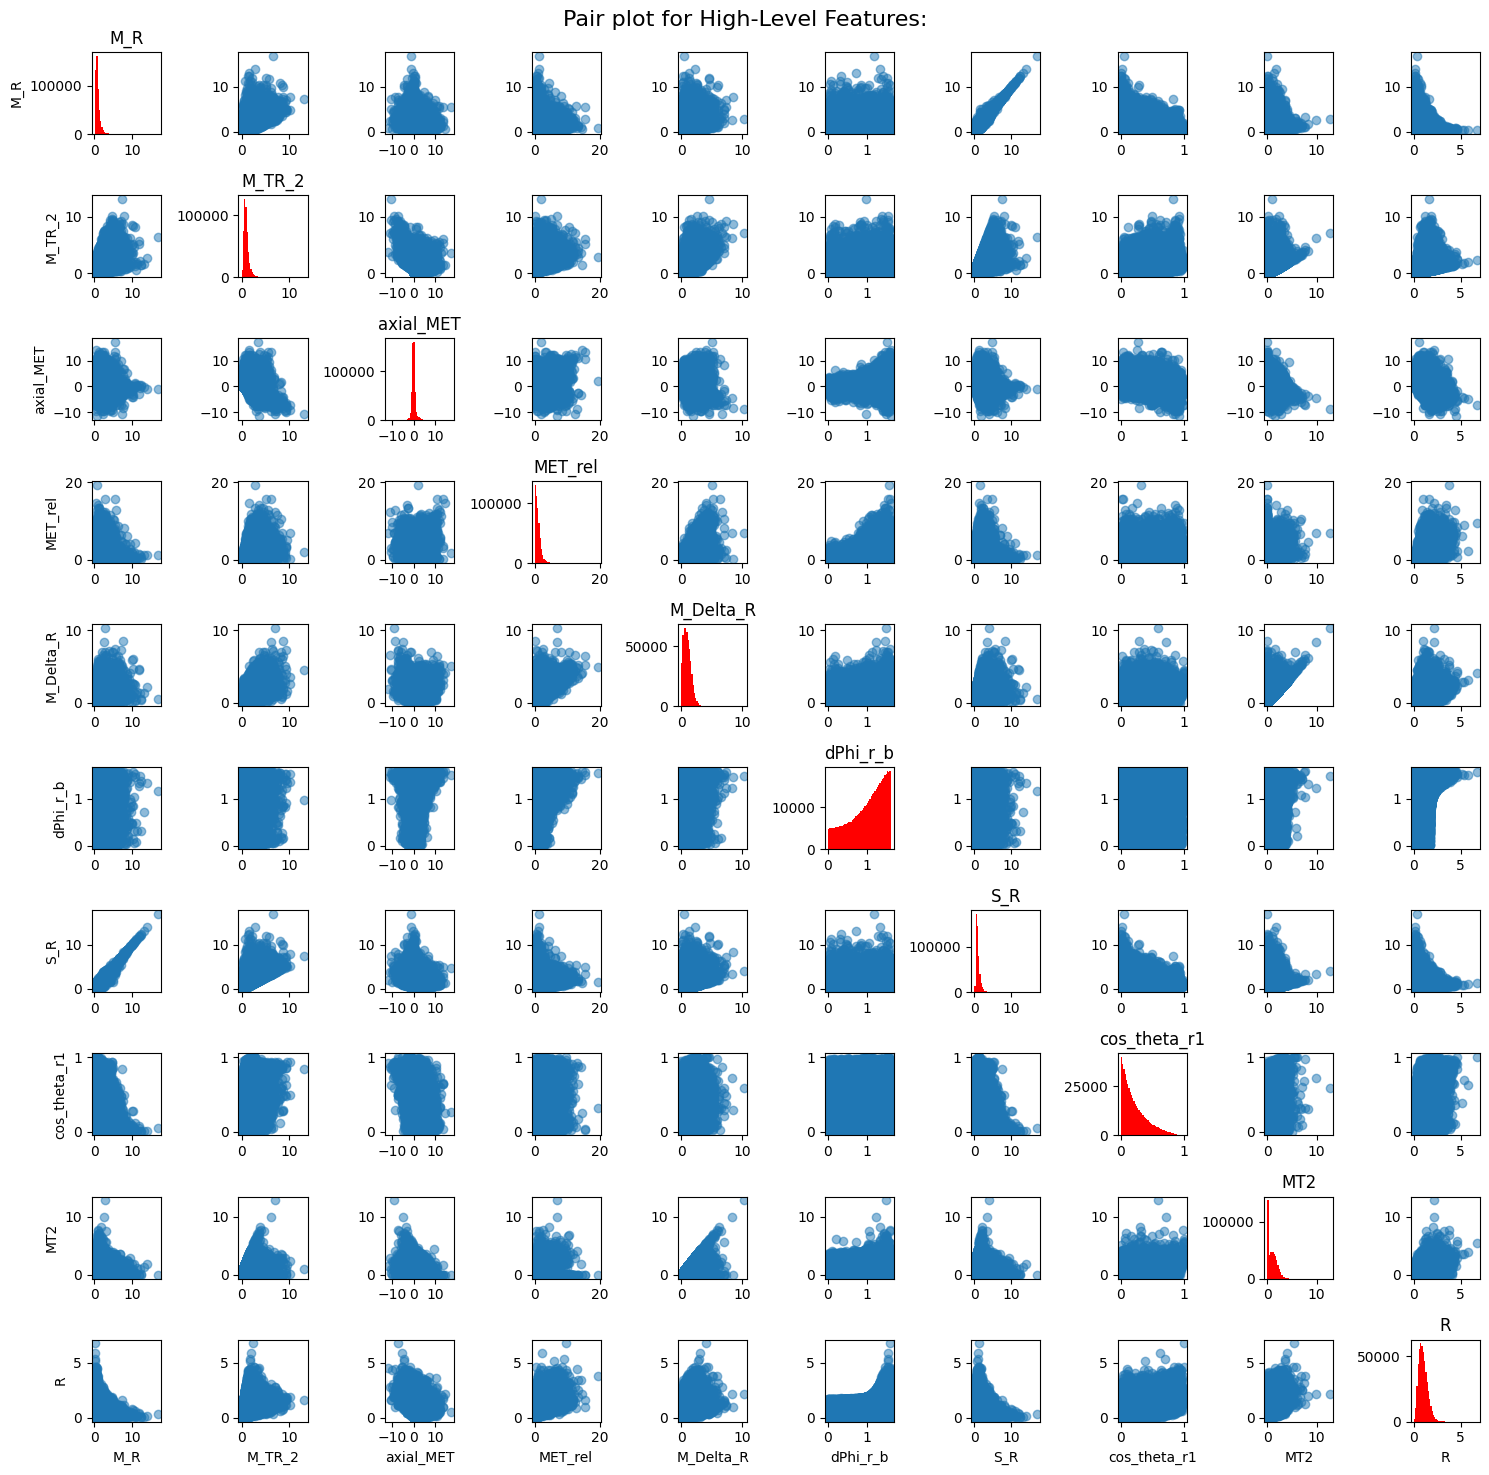

In [24]:
# Part b: Optimize pair plots

def optimized_pair_plots(df, variables, title):
    num_vars = len(variables)
    fig, axes = plt.subplots(num_vars, num_vars, figsize=(15, 15))

    data = [df[var].values for var in variables]

    for i in range(num_vars):
        for j in range(num_vars):
            if i == j:
                axes[i, j].hist(data[i], bins=50, color="red")
                axes[i, j].set_title(variables[i])
            else:
                axes[i, j].scatter(data[j], data[i], alpha=0.5)

            if i == num_vars - 1:
                axes[i, j].set_xlabel(variables[j])
            if j == 0:
                axes[i, j].set_ylabel(variables[i])
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

optimized_pair_plots(df, RawNames, "Pair plot for Low-Level Features:")
optimized_pair_plots(df, FeatureNames,"Pair plot for High-Level Features:")

Part c:

To identify the observables best for separating signal from background, we need to find histograms with distinct peaks or shapes since variables where the signal and background distributions have significantly different shapes or peak locations are good candidates for separation. We need to look for scatter plots with clear clustering since signal and background events usually to cluster in different regions of a scatter plot, the  variables are likely useful for separation. 

In the dataset, the observables that appear to be the most useful for separation include l_1_pT, l_2_pT, MET, MET_rel, axial_MET, and M_TR_2.

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [25]:
# Part a
!pip install tabulate

In [26]:
# part b

# All observables
all_observables = VarNames[1:]  # Exclude the 'signal' column
cov_matrix_all = np.cov(df[all_observables], rowvar=False)
corr_matrix_all = np.corrcoef(df[all_observables], rowvar=False)

# Low-level features
cov_matrix_low = np.cov(df[RawNames], rowvar=False)
corr_matrix_low = np.corrcoef(df[RawNames], rowvar=False)

# High-level features
cov_matrix_high = np.cov(df[FeatureNames], rowvar=False)
corr_matrix_high = np.corrcoef(df[FeatureNames], rowvar=False)

cov_matrix_all, corr_matrix_all, cov_matrix_low, corr_matrix_low, cov_matrix_high, corr_matrix_high

(array([[ 4.67481925e-01, -3.96674207e-04,  7.66214265e-05,
          3.05037988e-01, -3.48826988e-04,  7.37336647e-04,
          2.28434336e-01, -9.36714374e-04,  9.75240349e-02,
         -9.73253567e-03,  3.64432455e-01,  2.87223483e-01,
         -5.97024601e-02, -1.23988205e-02,  3.42587023e-01,
          9.77389248e-02, -4.69491360e-02,  2.21632465e-02],
        [-3.96674207e-04,  1.00430144e+00, -8.57630732e-04,
         -1.62905654e-04,  4.08312894e-01, -1.04201049e-03,
         -2.14697798e-03, -5.88968323e-04, -1.37057212e-03,
         -1.10889241e-03, -5.53826632e-04, -6.68920291e-04,
          3.01299870e-04,  4.27122683e-04, -6.04009571e-04,
         -9.87471350e-04, -7.40330277e-04,  3.21632240e-04],
        [ 7.66214265e-05, -8.57630732e-04,  1.00397336e+00,
          1.31296001e-03,  2.50714928e-04, -2.66810178e-01,
          7.66365893e-04, -1.84803977e-01,  7.06206018e-04,
         -1.87269105e-03,  1.06306621e-03,  8.68782730e-04,
          2.01595554e-04,  1.06029189e

In [27]:
# Part c
from IPython.display import HTML, display
import tabulate

def format_and_display_matrix(matrix, headers, title):
    """Formats a matrix for tabulate with headers and significant figures, then displays it with a title."""
    formatted_matrix = [[headers[i]] + [f"{val:.3f}" for val in row] for i, row in enumerate(matrix)]
    display(HTML(f"<h3>{title}</h3>"))
    display(HTML(tabulate.tabulate(formatted_matrix, tablefmt='html', headers=[''] + headers)))

# Display tables
format_and_display_matrix(cov_matrix_all, all_observables, "Covariance: All Features")
format_and_display_matrix(corr_matrix_all, all_observables, "Correlation: All Features")
format_and_display_matrix(cov_matrix_low, RawNames, "Covariance: Low-Level Features")
format_and_display_matrix(corr_matrix_low, RawNames, "Correlation: Low-Level Features")
format_and_display_matrix(cov_matrix_high, FeatureNames, "Covariance: High-Level Features")
format_and_display_matrix(corr_matrix_high, FeatureNames, "Correlation: High-Level Features")

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
l_1_pT,0.467,-0,0,0.305,-0,0.001,0.228,-0.001,0.098,-0.01,0.364,0.287,-0.06,-0.012,0.343,0.098,-0.047,0.022
l_1_eta,-0,1.004,-0.001,-0,0.408,-0.001,-0.002,-0.001,-0.001,-0.001,-0.001,-0.001,0,0,-0.001,-0.001,-0.001,0
l_1_phi,0,-0.001,1.004,0.001,0,-0.267,0.001,-0.185,0.001,-0.002,0.001,0.001,0,0.001,0.001,0.001,0.001,0
l_2_pT,0.305,-0,0.001,0.425,-0.001,0,0.079,-0.002,-0.001,0.051,0.325,0.163,-0.099,-0.069,0.322,0.006,-0.004,-0.028
l_2_eta,-0,0.408,0,-0.001,1.006,0,0,-0,0.001,-0.001,-0.001,0,0,0.001,-0.001,0.001,-0,0
l_2_phi,0.001,-0.001,-0.267,0,0,1.004,-0,-0.035,0.001,-0.002,0.001,0.001,0.001,0.002,0.001,0.001,-0,0
MET,0.228,-0.002,0.001,0.079,0,-0,0.762,-0.003,0.546,0.154,0.145,0.365,0.188,0.155,0.166,0.315,0.146,0.073
MET_phi,-0.001,-0.001,-0.185,-0.002,-0,-0.035,-0.003,1.003,-0.005,-0,-0.001,-0.001,-0,0,-0.002,-0.001,-0.002,0
MET_rel,0.098,-0.001,0.001,-0.001,0.001,0.001,0.546,-0.005,0.79,-0.12,0.044,0.302,0.249,0.409,0.082,0.415,0.146,0.055
axial_MET,-0.01,-0.001,-0.002,0.051,-0.001,-0.002,0.154,-0,-0.12,1.005,0.017,-0.185,-0.181,-0.461,-0.041,-0.233,-0.025,-0.054


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
l_1_pT,1,-0.001,0,0.684,-0.001,0.001,0.383,-0.001,0.16,-0.014,0.851,0.723,-0.186,-0.021,0.811,0.229,-0.157,0.165
l_1_eta,-0.001,1,-0.001,-0,0.406,-0.001,-0.002,-0.001,-0.002,-0.001,-0.001,-0.001,0.001,0,-0.001,-0.002,-0.002,0.002
l_1_phi,0,-0.001,1,0.002,0,-0.266,0.001,-0.184,0.001,-0.002,0.002,0.001,0,0.001,0.002,0.001,0.002,0.001
l_2_pT,0.684,-0,0.002,1,-0.001,0,0.14,-0.002,-0.001,0.078,0.797,0.43,-0.324,-0.123,0.799,0.014,-0.013,-0.217
l_2_eta,-0.001,0.406,0,-0.001,1,0,0,-0,0.001,-0.001,-0.001,0,0.001,0.002,-0.001,0.001,-0.001,0.001
l_2_phi,0.001,-0.001,-0.266,0,0,1,-0,-0.035,0.002,-0.002,0.001,0.001,0.001,0.003,0.001,0.002,-0.001,0
MET,0.383,-0.002,0.001,0.14,0,-0,1,-0.003,0.704,0.176,0.264,0.72,0.457,0.206,0.307,0.579,0.383,0.425
MET_phi,-0.001,-0.001,-0.184,-0.002,-0,-0.035,-0.003,1,-0.005,-0,-0.002,-0.002,-0,0,-0.003,-0.001,-0.004,0.001
MET_rel,0.16,-0.002,0.001,-0.001,0.001,0.002,0.704,-0.005,1,-0.134,0.078,0.584,0.595,0.535,0.15,0.748,0.378,0.316
axial_MET,-0.014,-0.001,-0.002,0.078,-0.001,-0.002,0.176,-0,-0.134,1,0.027,-0.317,-0.383,-0.535,-0.067,-0.373,-0.057,-0.272


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.467,-0,0,0.305,-0,0.001,0.228,-0.001
l_1_eta,-0,1.004,-0.001,-0,0.408,-0.001,-0.002,-0.001
l_1_phi,0,-0.001,1.004,0.001,0,-0.267,0.001,-0.185
l_2_pT,0.305,-0,0.001,0.425,-0.001,0,0.079,-0.002
l_2_eta,-0,0.408,0,-0.001,1.006,0,0,-0
l_2_phi,0.001,-0.001,-0.267,0,0,1.004,-0,-0.035
MET,0.228,-0.002,0.001,0.079,0,-0,0.762,-0.003
MET_phi,-0.001,-0.001,-0.185,-0.002,-0,-0.035,-0.003,1.003


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.001,0,0.684,-0.001,0.001,0.383,-0.001
l_1_eta,-0.001,1,-0.001,-0,0.406,-0.001,-0.002,-0.001
l_1_phi,0,-0.001,1,0.002,0,-0.266,0.001,-0.184
l_2_pT,0.684,-0,0.002,1,-0.001,0,0.14,-0.002
l_2_eta,-0.001,0.406,0,-0.001,1,0,0,-0
l_2_phi,0.001,-0.001,-0.266,0,0,1,-0,-0.035
MET,0.383,-0.002,0.001,0.14,0,-0,1,-0.003
MET_phi,-0.001,-0.001,-0.184,-0.002,-0,-0.035,-0.003,1


,M_R,M_TR_2,axial_MET,MET_rel,M_Delta_R,dPhi_r_b,S_R,cos_theta_r1,MT2,R
M_R,0.392,0.21,0.017,0.044,0.074,-0.029,0.38,-0.014,-0.037,-0.113
M_TR_2,0.21,0.338,-0.185,0.302,0.242,0.058,0.228,0.052,0.189,0.104
axial_MET,0.017,-0.185,1.005,-0.12,-0.233,-0.025,-0.041,-0.054,-0.461,-0.181
MET_rel,0.044,0.302,-0.12,0.79,0.415,0.146,0.082,0.055,0.409,0.249
M_Delta_R,0.074,0.242,-0.233,0.415,0.389,0.042,0.096,0.039,0.433,0.165
dPhi_r_b,-0.029,0.058,-0.025,0.146,0.042,0.19,-0.003,0.009,0.021,0.087
S_R,0.38,0.228,-0.041,0.082,0.096,-0.003,0.382,-0.01,-0.011,-0.083
cos_theta_r1,-0.014,0.052,-0.054,0.055,0.039,0.009,-0.01,0.039,0.045,0.058
MT2,-0.037,0.189,-0.461,0.409,0.433,0.021,-0.011,0.045,0.738,0.232
R,-0.113,0.104,-0.181,0.249,0.165,0.087,-0.083,0.058,0.232,0.222


,M_R,M_TR_2,axial_MET,MET_rel,M_Delta_R,dPhi_r_b,S_R,cos_theta_r1,MT2,R
M_R,1,0.577,0.027,0.078,0.189,-0.106,0.981,-0.116,-0.068,-0.383
M_TR_2,0.577,1,-0.317,0.584,0.668,0.229,0.635,0.451,0.379,0.38
axial_MET,0.027,-0.317,1,-0.134,-0.373,-0.057,-0.067,-0.272,-0.535,-0.383
MET_rel,0.078,0.584,-0.134,1,0.748,0.378,0.15,0.316,0.535,0.595
M_Delta_R,0.189,0.668,-0.373,0.748,1,0.155,0.249,0.319,0.809,0.564
dPhi_r_b,-0.106,0.229,-0.057,0.378,0.155,1,-0.013,0.106,0.056,0.424
S_R,0.981,0.635,-0.067,0.15,0.249,-0.013,1,-0.085,-0.021,-0.287
cos_theta_r1,-0.116,0.451,-0.272,0.316,0.319,0.106,-0.085,1,0.264,0.627
MT2,-0.068,0.379,-0.535,0.535,0.809,0.056,-0.021,0.264,1,0.574
R,-0.383,0.38,-0.383,0.595,0.564,0.424,-0.287,0.627,0.574,1


In [29]:
# Part d
def format_matrix(matrix, variables):
    """Formats the covariance/correlation matrix as a table for display."""
    formatted = [[variables[i]] + list(row) for i, row in enumerate(matrix)]
    return formatted
def compute_and_display_matrices(df, variables, title):
    """Computes and displays covariance and correlation matrices using tabulate."""
    cov_matrix = np.cov(df[variables], rowvar=False)
    corr_matrix = np.corrcoef(df[variables], rowvar=False)

    table_cov = format_matrix(cov_matrix, variables)
    table_corr = format_matrix(corr_matrix, variables)

    display(HTML(f"<h3>{title}</h3>"))  # Add a title
    display(HTML(tabulate.tabulate(table_cov, tablefmt='html', headers=[''] + variables)))
    display(HTML(tabulate.tabulate(table_corr, tablefmt='html', headers=[''] + variables)))

compute_and_display_matrices(df, all_observables, "All Observables")
compute_and_display_matrices(df, RawNames, "Low-level Features")
compute_and_display_matrices(df, FeatureNames, "High-level Features")

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
l_1_pT,0.467482,-0.000396674,7.66214e-05,0.305038,-0.000348827,0.000737337,0.228434,-0.000936714,0.097524,-0.00973254,0.364432,0.287223,-0.0597025,-0.0123988,0.342587,0.0977389,-0.0469491,0.0221632
l_1_eta,-0.000396674,1.0043,-0.000857631,-0.000162906,0.408313,-0.00104201,-0.00214698,-0.000588968,-0.00137057,-0.00110889,-0.000553827,-0.00066892,0.0003013,0.000427123,-0.00060401,-0.000987471,-0.00074033,0.000321632
l_1_phi,7.66214e-05,-0.000857631,1.00397,0.00131296,0.000250715,-0.26681,0.000766366,-0.184804,0.000706206,-0.00187269,0.00106307,0.000868783,0.000201596,0.00106029,0.00146377,0.000901233,0.000994306,0.000259098
l_2_pT,0.305038,-0.000162906,0.00131296,0.42549,-0.000575571,0.000155884,0.0794519,-0.00156177,-0.000533893,0.0513299,0.325434,0.162941,-0.0993511,-0.0688858,0.32194,0.00571563,-0.00383465,-0.0279102
l_2_eta,-0.000348827,0.408313,0.000250715,-0.000575571,1.00626,0.000441588,0.000381652,-0.000322449,0.00108429,-0.000756451,-0.000607671,1.88755e-05,0.000320625,0.00139889,-0.000678582,0.000670436,-0.000306871,0.000296341
l_2_phi,0.000737337,-0.00104201,-0.26681,0.000155884,0.000441588,1.0038,-0.000303976,-0.0354343,0.00144703,-0.0018005,0.000759915,0.00050892,0.000551145,0.00225915,0.000906438,0.0013266,-0.000241209,3.70399e-05
MET,0.228434,-0.00214698,0.000766366,0.0794519,0.000381652,-0.000303976,0.762249,-0.00279213,0.546481,0.153956,0.144522,0.365194,0.187912,0.154785,0.165543,0.315143,0.145682,0.0730924
MET_phi,-0.000936714,-0.000588968,-0.184804,-0.00156177,-0.000322449,-0.0354343,-0.00279213,1.00331,-0.0048952,-0.000441791,-0.00148315,-0.001201,-0.00022953,8.38685e-05,-0.00170675,-0.000569851,-0.00170906,0.000119405
MET_rel,0.097524,-0.00137057,0.000706206,-0.000533893,0.00108429,0.00144703,0.546481,-0.0048952,0.790489,-0.119851,0.0436845,0.301993,0.248824,0.408779,0.0823154,0.414743,0.146439,0.0553179
axial_MET,-0.00973254,-0.00110889,-0.00187269,0.0513299,-0.000756451,-0.0018005,0.153956,-0.000441791,-0.119851,1.00537,0.0171346,-0.185017,-0.1809,-0.460999,-0.0413828,-0.233074,-0.0251128,-0.0537349


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
l_1_pT,1,-0.000578921,0.000111842,0.683954,-0.000508594,0.00107637,0.382675,-0.00136775,0.160428,-0.0141965,0.851136,0.722754,-0.185501,-0.021114,0.810678,0.229309,-0.157454,0.164501
l_1_eta,-0.000578921,1,-0.000854097,-0.000249206,0.406167,-0.00103781,-0.00245385,-0.000586735,-0.00153823,-0.00110355,-0.000882483,-0.0011484,0.00063871,0.000496241,-0.000975151,-0.00158062,-0.00169395,0.00162871
l_1_phi,0.000111842,-0.000854097,1,0.00200884,0.000249438,-0.265777,0.000876046,-0.184133,0.000792725,-0.00186398,0.0016942,0.00149177,0.000427422,0.00123207,0.00236358,0.00144282,0.00227545,0.00131226
l_2_pT,0.683954,-0.000249206,0.00200884,1,-0.000879627,0.000238525,0.139512,-0.00239031,-0.000920581,0.0784805,0.796679,0.429772,-0.323567,-0.122958,0.798528,0.0140558,-0.01348,-0.217138
l_2_eta,-0.000508594,0.406167,0.000249438,-0.000879627,1,0.000439378,0.000435776,-0.000320913,0.00121574,-0.000752075,-0.000967334,3.2374e-05,0.000679012,0.00162368,-0.00109448,0.0010721,-0.000701469,0.00149917
l_2_phi,0.00107637,-0.00103781,-0.265777,0.000238525,0.000439378,1,-0.00034751,-0.0353088,0.00162445,-0.00179228,0.00121117,0.000873935,0.00116864,0.00262539,0.00146378,0.00212398,-0.000552051,0.000187613
MET,0.382675,-0.00245385,0.000876046,0.139512,0.000435776,-0.00034751,1,-0.00319278,0.70401,0.175867,0.264332,0.719661,0.457239,0.20642,0.306776,0.579022,0.382618,0.424855
MET_phi,-0.00136775,-0.000586735,-0.184133,-0.00239031,-0.000320913,-0.0353088,-0.00319278,1,-0.00549673,-0.000439881,-0.00236446,-0.0020629,-0.000486809,9.74883e-05,-0.00275684,-0.000912596,-0.00391244,0.000604952
MET_rel,0.160428,-0.00153823,0.000792725,-0.000920581,0.00121574,0.00162445,0.70401,-0.00549673,1,-0.134441,0.0784593,0.584388,0.594539,0.535318,0.149794,0.748284,0.377675,0.315743
axial_MET,-0.0141965,-0.00110355,-0.00186398,0.0784805,-0.000752075,-0.00179228,0.175867,-0.000439881,-0.134441,1,0.0272881,-0.317468,-0.383276,-0.535313,-0.0667754,-0.372877,-0.0574301,-0.271963


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.467482,-0.000396674,7.66214e-05,0.305038,-0.000348827,0.000737337,0.228434,-0.000936714
l_1_eta,-0.000396674,1.0043,-0.000857631,-0.000162906,0.408313,-0.00104201,-0.00214698,-0.000588968
l_1_phi,7.66214e-05,-0.000857631,1.00397,0.00131296,0.000250715,-0.26681,0.000766366,-0.184804
l_2_pT,0.305038,-0.000162906,0.00131296,0.42549,-0.000575571,0.000155884,0.0794519,-0.00156177
l_2_eta,-0.000348827,0.408313,0.000250715,-0.000575571,1.00626,0.000441588,0.000381652,-0.000322449
l_2_phi,0.000737337,-0.00104201,-0.26681,0.000155884,0.000441588,1.0038,-0.000303976,-0.0354343
MET,0.228434,-0.00214698,0.000766366,0.0794519,0.000381652,-0.000303976,0.762249,-0.00279213
MET_phi,-0.000936714,-0.000588968,-0.184804,-0.00156177,-0.000322449,-0.0354343,-0.00279213,1.00331


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.000578921,0.000111842,0.683954,-0.000508594,0.00107637,0.382675,-0.00136775
l_1_eta,-0.000578921,1,-0.000854097,-0.000249206,0.406167,-0.00103781,-0.00245385,-0.000586735
l_1_phi,0.000111842,-0.000854097,1,0.00200884,0.000249438,-0.265777,0.000876046,-0.184133
l_2_pT,0.683954,-0.000249206,0.00200884,1,-0.000879627,0.000238525,0.139512,-0.00239031
l_2_eta,-0.000508594,0.406167,0.000249438,-0.000879627,1,0.000439378,0.000435776,-0.000320913
l_2_phi,0.00107637,-0.00103781,-0.265777,0.000238525,0.000439378,1,-0.00034751,-0.0353088
MET,0.382675,-0.00245385,0.000876046,0.139512,0.000435776,-0.00034751,1,-0.00319278
MET_phi,-0.00136775,-0.000586735,-0.184133,-0.00239031,-0.000320913,-0.0353088,-0.00319278,1


,M_R,M_TR_2,axial_MET,MET_rel,M_Delta_R,dPhi_r_b,S_R,cos_theta_r1,MT2,R
M_R,0.392167,0.209875,0.0171346,0.0436845,0.07393,-0.0289617,0.379763,-0.0143412,-0.0365444,-0.112904
M_TR_2,0.209875,0.337827,-0.185017,0.301993,0.241865,0.058133,0.228125,0.0516659,0.18917,0.104014
axial_MET,0.0171346,-0.185017,1.00537,-0.119851,-0.233074,-0.0251128,-0.0413828,-0.0537349,-0.460999,-0.1809
MET_rel,0.0436845,0.301993,-0.119851,0.790489,0.414743,0.146439,0.0823154,0.0553179,0.408779,0.248824
M_Delta_R,0.07393,0.241865,-0.233074,0.414743,0.388624,0.0422407,0.0957808,0.0392089,0.432897,0.165483
dPhi_r_b,-0.0289617,0.058133,-0.0251128,0.146439,0.0422407,0.190188,-0.00345651,0.00908347,0.0208972,0.0870914
S_R,0.379763,0.228125,-0.0413828,0.0823154,0.0957808,-0.00345651,0.382015,-0.0103629,-0.0110375,-0.0833587
cos_theta_r1,-0.0143412,0.0516659,-0.0537349,0.0553179,0.0392089,0.00908347,-0.0103629,0.0388299,0.0446289,0.0581608
MT2,-0.0365444,0.18917,-0.460999,0.408779,0.432897,0.0208972,-0.0110375,0.0446289,0.737661,0.2321
R,-0.112904,0.104014,-0.1809,0.248824,0.165483,0.0870914,-0.0833587,0.0581608,0.2321,0.221578


,M_R,M_TR_2,axial_MET,MET_rel,M_Delta_R,dPhi_r_b,S_R,cos_theta_r1,MT2,R
M_R,1,0.576603,0.0272881,0.0784593,0.189374,-0.106046,0.981155,-0.116216,-0.0679449,-0.383011
M_TR_2,0.576603,1,-0.317468,0.584388,0.667515,0.229342,0.635017,0.4511,0.378944,0.380174
axial_MET,0.0272881,-0.317468,1,-0.134441,-0.372877,-0.0574301,-0.0667754,-0.271963,-0.535313,-0.383276
MET_rel,0.0784593,0.584388,-0.134441,1,0.748284,0.377675,0.149794,0.315743,0.535318,0.594539
M_Delta_R,0.189374,0.667515,-0.372877,0.748284,1,0.155372,0.248584,0.31918,0.808521,0.56393
dPhi_r_b,-0.106046,0.229342,-0.0574301,0.377675,0.155372,1,-0.0128235,0.1057,0.0557916,0.424248
S_R,0.981155,0.635017,-0.0667754,0.149794,0.248584,-0.0128235,1,-0.085086,-0.0207923,-0.286515
cos_theta_r1,-0.116216,0.4511,-0.271963,0.315743,0.31918,0.1057,-0.085086,1,0.263697,0.627024
MT2,-0.0679449,0.378944,-0.535313,0.535318,0.808521,0.0557916,-0.0207923,0.263697,1,0.574095
R,-0.383011,0.380174,-0.383276,0.594539,0.56393,0.424248,-0.286515,0.627024,0.574095,1


Hint: Example code for embedding a `tabulate` table into a notebook:

In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

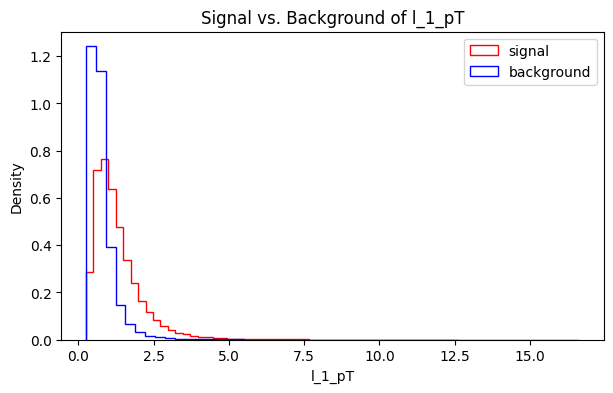

For l_1_pT, consider using: x > xc


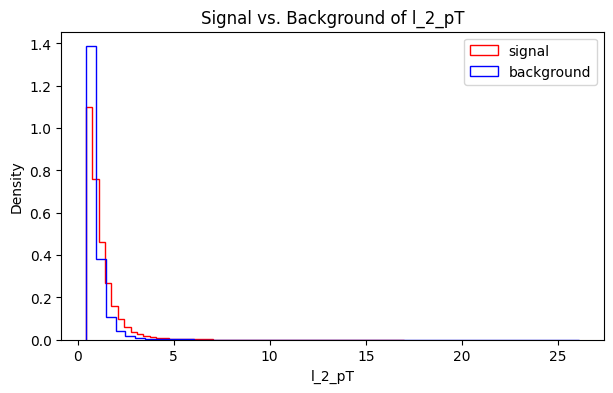

For l_2_pT, consider using: x > xc


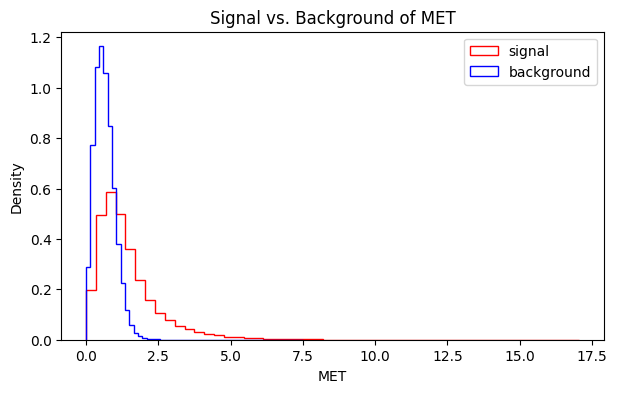

For MET, consider using: x > xc


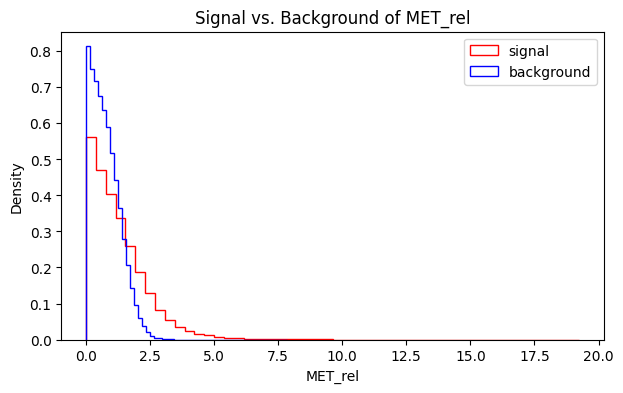

For MET_rel, consider using: x > xc


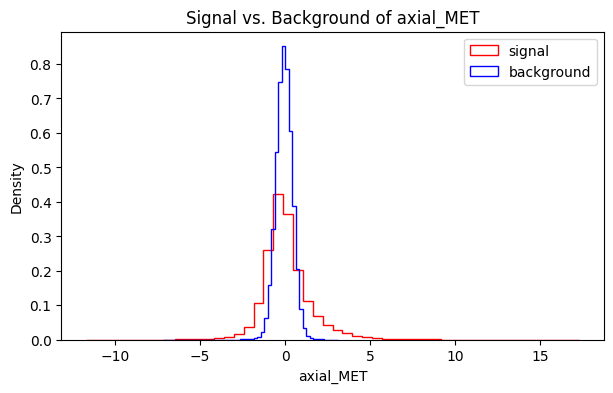

For axial_MET, consider using: x > xc


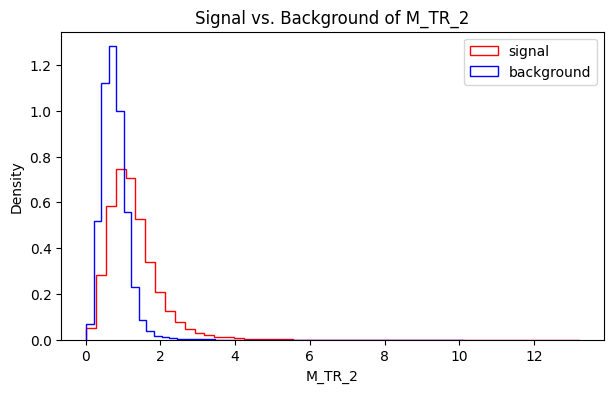

For M_TR_2, consider using: x > xc


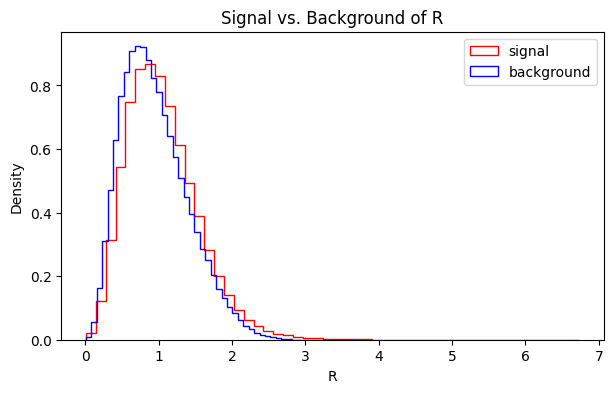

For R, consider using: x > xc


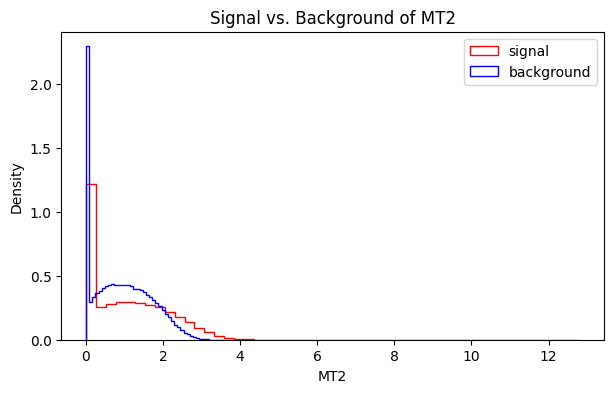

For MT2, consider using: x > xc


In [30]:
# Exercise 5.1

def suggest_criteria(observable):
    plt.figure(figsize=(7, 4))
    plt.hist(df_sig[observable], bins=50, histtype="step", color="red", label="signal", density=True)
    plt.hist(df_bkg[observable], bins=50, histtype="step", color="blue", label="background", density=True)
    plt.xlabel(observable)
    plt.ylabel("Density")
    plt.legend()
    plt.title(f"Signal vs. Background of {observable}")
    plt.show()

    sig_mean = df_sig[observable].mean()
    bkg_mean = df_bkg[observable].mean()
    sig_std = df_sig[observable].std()
    bkg_std = df_bkg[observable].std()

    if df_sig[observable].mean() > df_bkg[observable].mean():
        if df_sig[observable].std() < df_bkg[observable].std():
            print(f"For {observable}, consider using: x > xc")  # Signal has higher mean and lower std
        else:
            print(f"For {observable}, consider using: x > xc")  # Signal has higher mean
    else:  # Signal has lower or equal mean
        if df_sig[observable].std() < df_bkg[observable].std():
            print(f"For {observable}, consider using: |x - u| < xc")  # Signal has lower std, use absolute difference
        else:
            print(f"For {observable}, consider using: x < xc")  # Signal has lower mean, select values below threshold

# Apply to all observables
observables_to_analyze = ["l_1_pT", "l_2_pT", "MET", "MET_rel", "axial_MET", "M_TR_2", "R", "MT2"]
for observable in observables_to_analyze:
    suggest_criteria(observable)

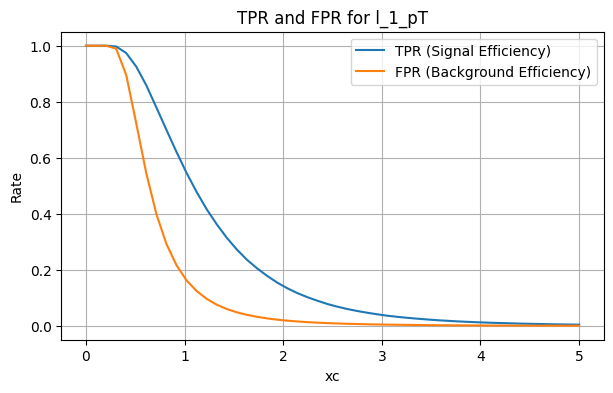

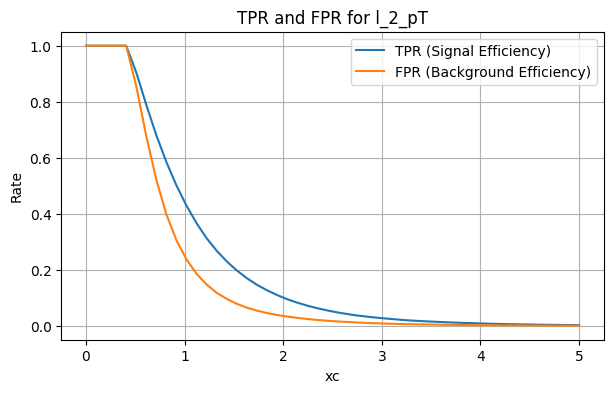

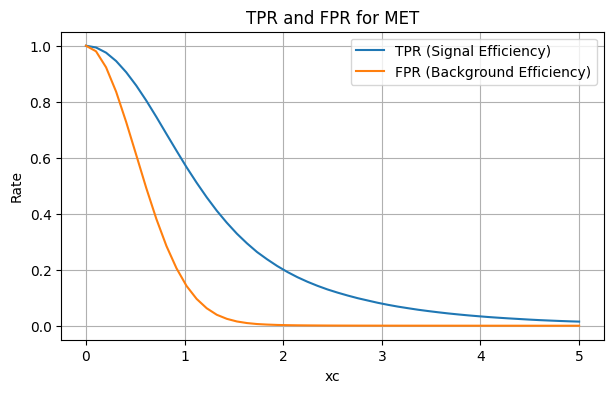

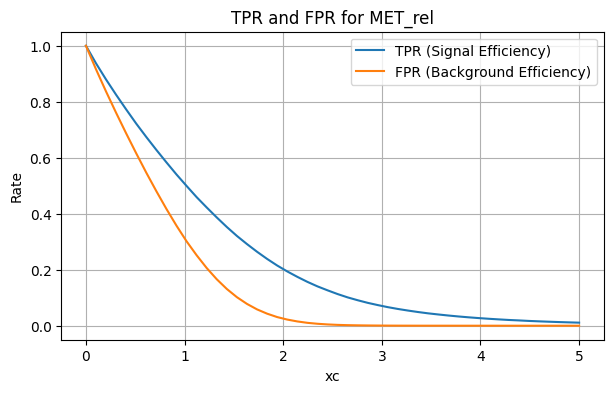

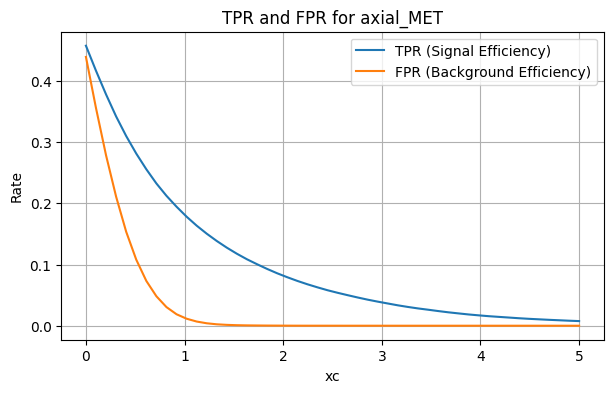

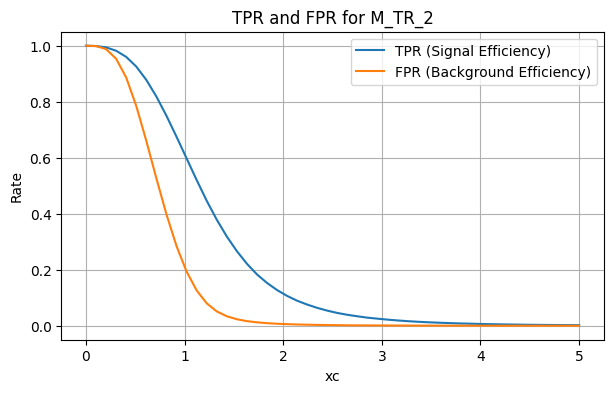

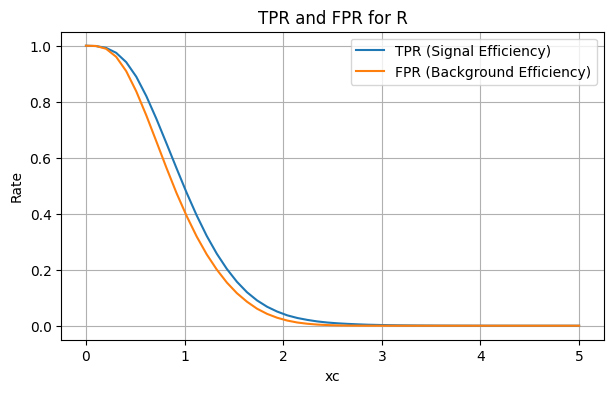

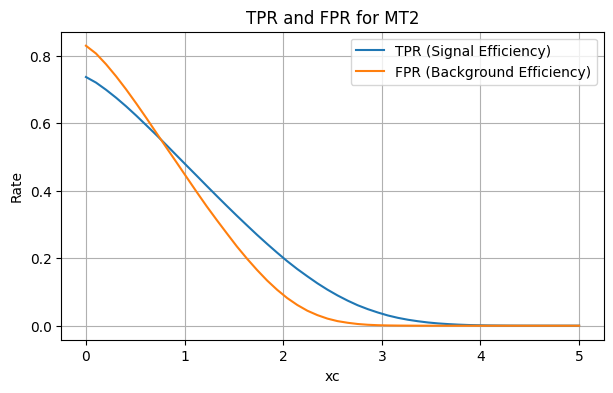

In [31]:
# Exercise 5.2

def calculate_tpr_fpr(df_sig, df_bkg, observable, strategy, xc_range):
    tpr_values = []
    fpr_values = []
    for xc in xc_range:
        if strategy == ">":
            sig_selected = df_sig[df_sig[observable] > xc]
            bkg_selected = df_bkg[df_bkg[observable] > xc]
        elif strategy == "<":
            sig_selected = df_sig[df_sig[observable] < xc]
            bkg_selected = df_bkg[df_bkg[observable] < xc]
        elif strategy == "abs_diff":
            sig_mean = df_sig[observable].mean()
            sig_selected = df_sig[abs(df_sig[observable] - sig_mean) < xc]
            bkg_mean = df_bkg[observable].mean()
            bkg_selected = df_bkg[abs(df_bkg[observable] - bkg_mean) < xc]

        tpr = len(sig_selected) / len(df_sig)  # signal efficiency
        fpr = len(bkg_selected) / len(df_bkg)  # background efficiency
        tpr_values.append(tpr)
        fpr_values.append(fpr)
    return tpr_values, fpr_values

observables_strategies = {
    "l_1_pT": ">",
    "l_2_pT": ">",
    "MET": ">",
    "MET_rel": ">",
    "axial_MET": ">",
    "M_TR_2": ">",
    "R": ">",
    "MT2": ">"
}

xc_range = np.linspace(0, 5, 50)  

# Plot each observable separately
for observable, strategy in observables_strategies.items():
    tpr_values, fpr_values = calculate_tpr_fpr(df_sig, df_bkg, observable, strategy, xc_range)
    
    plt.figure(figsize=(7, 4))  
    plt.plot(xc_range, tpr_values, label="TPR (Signal Efficiency)")
    plt.plot(xc_range, fpr_values, label="FPR (Background Efficiency)")
    plt.xlabel("xc")
    plt.ylabel("Rate")
    plt.title(f"TPR and FPR for {observable}")
    plt.legend()
    plt.grid(True)
    plt.show()

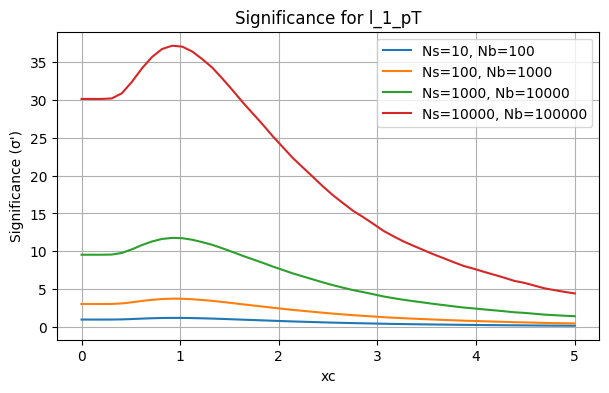

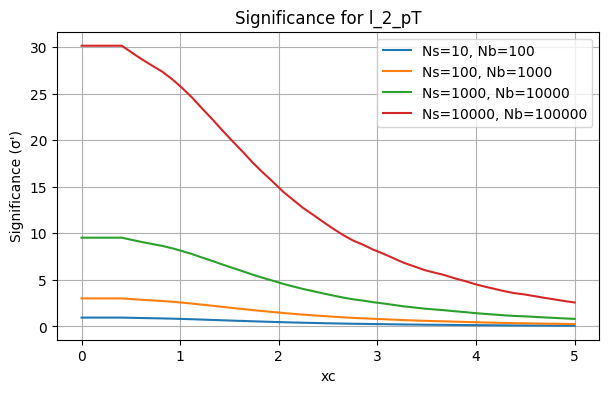

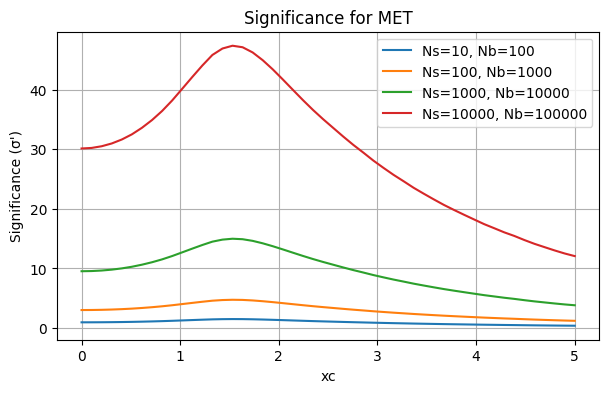

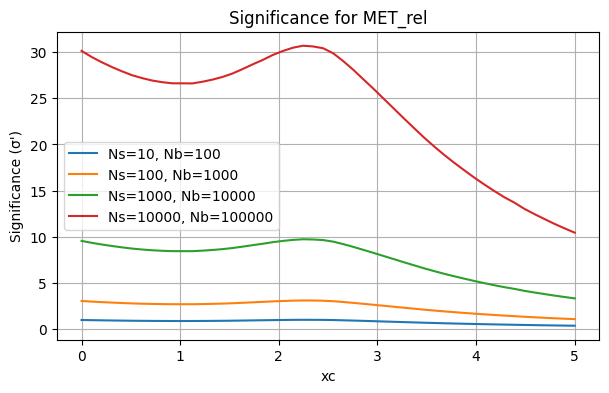

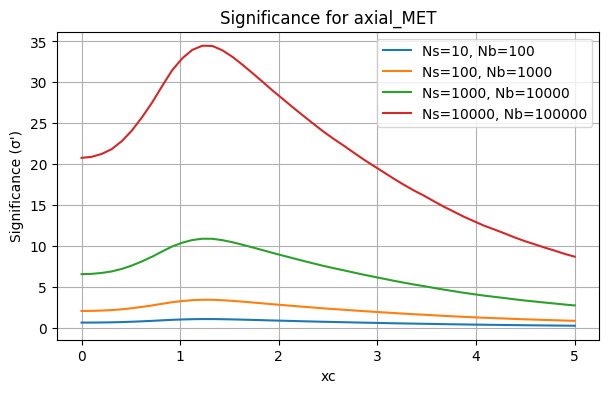

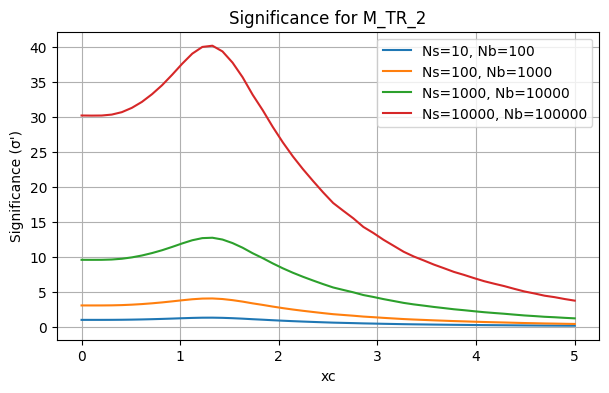

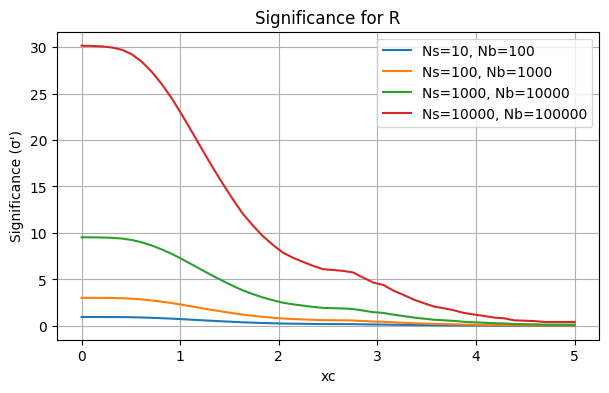

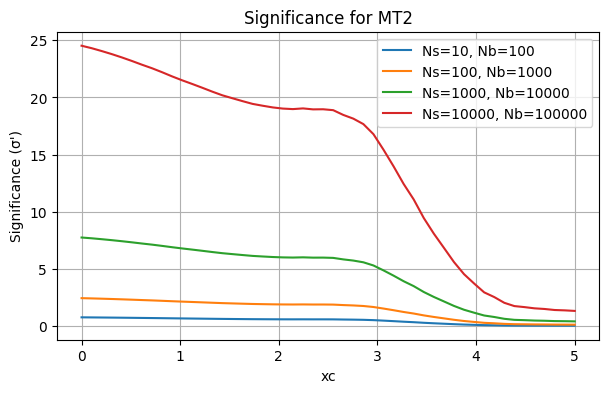

In [32]:
# Exercise 5.3

scenarios = [
        (10, 100),
        (100, 1000),
        (1000, 10000),
        (10000, 100000)
    ]

observables_strategies = {
    "l_1_pT": ">",
    "l_2_pT": ">",
    "MET": ">",
    "MET_rel": ">",
    "axial_MET": ">",
    "M_TR_2": ">",
    "R": ">",
    "MT2": ">"
}

xc_range = np.linspace(0, 5, 50)  

for observable, strategy in observables_strategies.items():
    plt.figure(figsize=(7, 4))  
    for scenario in scenarios:
        Ns, Nb = scenario  
        tpr_values, fpr_values = calculate_tpr_fpr(df_sig, df_bkg, observable, strategy, xc_range)
        
        # Calculate significance
        significance = [(tpr * Ns) / np.sqrt(tpr * Ns + fpr * Nb) for tpr, fpr in zip(tpr_values, fpr_values)]
        plt.plot(xc_range, significance, label=f"Ns={Ns}, Nb={Nb}")
    
    plt.xlabel("xc")
    plt.ylabel("Significance (σ')")
    plt.title(f"Significance for {observable}")
    plt.legend()
    plt.grid(True)
    plt.show()

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [33]:
# Exercise 6.1

scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]
observables = ["l_1_pT", "MET", "M_TR_2"] 

# placeholder for optimal xc values
optimal_xc_values = {} 

for observable in observables:
    xc_range = np.linspace(0, 5, 50)  
    all_significance_values = []  
    for xc in xc_range:
        significance_values = []
        for Ns, Nb in scenarios:
            tpr, fpr = calculate_tpr_fpr(df_sig, df_bkg, observable, ">", [xc]) 
            tpr, fpr = tpr[0], fpr[0]  
            significance = (tpr * Ns) / np.sqrt(tpr * Ns + fpr * Nb)
            significance_values.append(significance)
        all_significance_values.append(np.mean(significance_values)) # avg significance
    
    optimal_xc = xc_range[np.argmax(all_significance_values)]  
    optimal_xc_values[observable] = optimal_xc.item() 

for observable, xc_value in optimal_xc_values.items():
    print(f"Optimal xc for {observable}: {xc_value:.3f}") 

Optimal xc for l_1_pT: 0.918
Optimal xc for MET: 1.531
Optimal xc for M_TR_2: 1.327


In [34]:
# Exercise 6.2

from tabulate import tabulate
from IPython.display import HTML, display

scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]
observables = ["l_1_pT", "MET", "M_TR_2"]
# optimal cut thresholds 
cuts = {
    "l_1_pT": 0.918, 
    "MET": 1.531,
    "M_TR_2": 1.327
}

def create_cutflow_table(Ns, Nb):
    sig_cut = df_sig.copy()
    bkg_cut = df_bkg.copy()
    cutflow_data = []

    for feature, threshold in cuts.items():
        sig_cut = sig_cut[sig_cut[feature] > threshold]
        bkg_cut = bkg_cut[bkg_cut[feature] > threshold]
        eps_s = len(sig_cut) / len(df_sig)
        eps_b = len(bkg_cut) / len(df_bkg)
        Np_S = eps_s * Ns
        Np_B = eps_b * Nb
        sigma_s = Np_S / np.sqrt(Np_S + Np_B + 1e-9) # Avoid division by zero
        cutflow_data.append([
            f"{feature} > {threshold:.3f}",
            round(eps_s, 4),
            round(eps_b, 4),
            int(Np_S),
            int(Np_B),
            round(sigma_s, 4)
        ])
    headers = ["Cut Applied", "ε_S", "ε_B", "N'_S", "N'_B", "σ_S'"]
    table_html = tabulate(cutflow_data, headers=headers, tablefmt='html')
    return table_html
    
# tables for each scenario
for Ns, Nb in scenarios:
    display(HTML(f"<h3>Scenario: Ns = {Ns}, Nb = {Nb}</h3>"))
    display(HTML(create_cutflow_table(Ns, Nb)))

Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
l_1_pT > 0.918,0.6209,0.2166,6,21,1.1762
MET > 1.531,0.2356,0.008,2,0,1.3269
M_TR_2 > 1.327,0.1953,0.0078,1,0,1.1809


Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
l_1_pT > 0.918,0.6209,0.2166,62,216,3.7194
MET > 1.531,0.2356,0.008,23,7,4.1961
M_TR_2 > 1.327,0.1953,0.0078,19,7,3.7343


Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
l_1_pT > 0.918,0.6209,0.2166,620,2166,11.7619
MET > 1.531,0.2356,0.008,235,79,13.2691
M_TR_2 > 1.327,0.1953,0.0078,195,78,11.809


Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
l_1_pT > 0.918,0.6209,0.2166,6209,21660,37.1944
MET > 1.531,0.2356,0.008,2355,795,41.9606
M_TR_2 > 1.327,0.1953,0.0078,1953,782,37.3433


In [35]:
# Exercise 6.3
from tabulate import tabulate
from IPython.display import HTML, display

def optimize_second_cut(df_sig, df_bkg, first_observable, first_cut, second_observable, scenarios):
    """Optimizes the cut for the second observable after applying the first cut."""
    # apply the first cut
    df_sig_cut = df_sig[df_sig[first_observable] > first_cut]
    df_bkg_cut = df_bkg[df_bkg[first_observable] > first_cut]
    
    # Optimize second cut 
    xc_range = np.linspace(0, 5, 50)  
    all_significance_values = []

    for xc in xc_range:
        significance_values = []
        for Ns, Nb in scenarios:
            tpr, fpr = calculate_tpr_fpr(df_sig_cut, df_bkg_cut, second_observable, ">", [xc])
            tpr, fpr = tpr[0], fpr[0]
            significance = (tpr * Ns) / np.sqrt(tpr * Ns + fpr * Nb)
            significance_values.append(significance)
        all_significance_values.append(np.mean(significance_values))
    optimal_xc = xc_range[np.argmax(all_significance_values)]
    return optimal_xc.item()  # return the optimized cut value

def create_cutflow_table_sequential(Ns, Nb, first_observable, second_observable):
    sig_cut = df_sig.copy()
    bkg_cut = df_bkg.copy()
    cutflow_data = []
    # First cut (using initial optimized value)
    first_cut = 0.918  
    sig_cut = sig_cut[sig_cut[first_observable] > first_cut]
    bkg_cut = bkg_cut[bkg_cut[first_observable] > first_cut]
    eps_s = len(sig_cut) / len(df_sig)
    eps_b = len(bkg_cut) / len(df_bkg)
    Np_S = eps_s * Ns
    Np_B = eps_b * Nb
    sigma_s = Np_S / np.sqrt(Np_S + Np_B + 1e-9)
    cutflow_data.append([
        f"{first_observable} > {first_cut:.3f}",
        round(eps_s, 4),
        round(eps_b, 4),
        int(Np_S),
        int(Np_B),
        round(sigma_s, 4)
    ])    
    # Second cut (optimized after first cut)
    optimal_second_cut = optimize_second_cut(df_sig, df_bkg, first_observable, first_cut, second_observable, scenarios)
    sig_cut = sig_cut[sig_cut[second_observable] > optimal_second_cut]
    bkg_cut = bkg_cut[bkg_cut[second_observable] > optimal_second_cut]
    eps_s = len(sig_cut) / len(df_sig)
    eps_b = len(bkg_cut) / len(df_bkg)
    Np_S = eps_s * Ns
    Np_B = eps_b * Nb
    sigma_s = Np_S / np.sqrt(Np_S + Np_B + 1e-9)
    cutflow_data.append([
        f"{second_observable} > {optimal_second_cut:.3f}",
        round(eps_s, 4),
        round(eps_b, 4),
        int(Np_S),
        int(Np_B),
        round(sigma_s, 4)
    ])
    headers = ["Cut Applied", "ε_S", "ε_B", "N'_S", "N'_B", "σ_S'"]
    table_html = tabulate(cutflow_data, headers=headers, tablefmt='html')
    return table_html

for Ns, Nb in scenarios:
    display(HTML(f"<h3>Scenario: Ns = {Ns}, Nb = {Nb}</h3>"))
    # Order 1: l_1_pT then MET
    display(HTML(f"<h4>Selection Order: l_1_pT then MET</h4>"))
    display(HTML(create_cutflow_table_sequential(Ns, Nb, "l_1_pT", "MET")))
    # Order 2: MET then l_1_pT
    display(HTML(f"<h4>Selection Order: MET then l_1_pT</h4>"))
    display(HTML(create_cutflow_table_sequential(Ns, Nb, "MET", "l_1_pT")))

Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
l_1_pT > 0.918,0.6209,0.2166,6,21,1.1762
MET > 1.531,0.2357,0.008,2,0,1.3268


Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
MET > 0.918,0.6251,0.2052,6,20,1.2082
l_1_pT > 0.918,0.4203,0.0575,4,5,1.3323


Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
l_1_pT > 0.918,0.6209,0.2166,62,216,3.7194
MET > 1.531,0.2357,0.008,23,7,4.1959


Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
MET > 0.918,0.6251,0.2052,62,205,3.8205
l_1_pT > 0.918,0.4203,0.0575,42,57,4.2131


Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
l_1_pT > 0.918,0.6209,0.2166,620,2166,11.7619
MET > 1.531,0.2357,0.008,235,79,13.2684


Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
MET > 0.918,0.6251,0.2052,625,2052,12.0816
l_1_pT > 0.918,0.4203,0.0575,420,574,13.3229


Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
l_1_pT > 0.918,0.6209,0.2166,6209,21660,37.1944
MET > 1.531,0.2357,0.008,2356,797,41.9585


Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
MET > 0.918,0.6251,0.2052,6251,20522,38.2055
l_1_pT > 0.918,0.4203,0.0575,4202,5748,42.1306


When we change the order we can see improved significance since sequential selection leads to better significance compared to independent optimization escpecially if they are highly correlated.

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



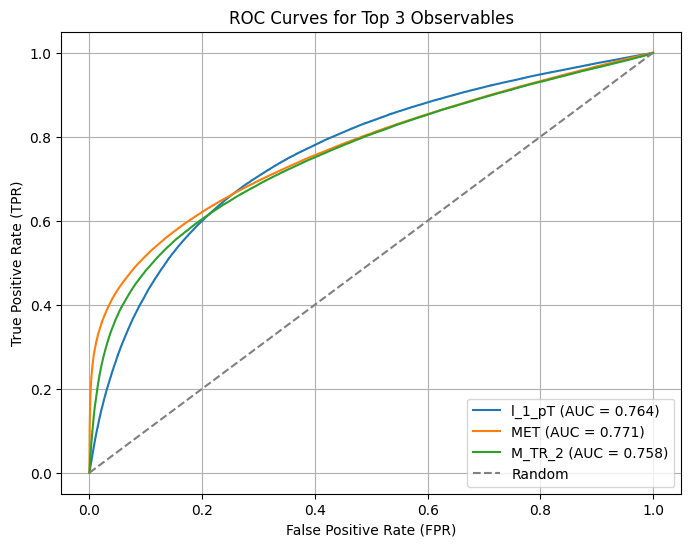

In [36]:
# Exercise 7.1 
from sklearn.metrics import roc_curve, auc, roc_auc_score

observables = ["l_1_pT", "MET", "M_TR_2"]
plt.figure(figsize=(8, 6))

for observable in observables:
    y_true = np.concatenate([np.ones(len(df_sig)), np.zeros(len(df_bkg))])
    y_scores = np.concatenate([df_sig[observable], df_bkg[observable]])
    
    # remove NaN values from y_true and y_scores
    not_nan_mask = np.isfinite(y_scores)  # Create a mask for non-NaN values
    y_true = y_true[not_nan_mask]
    y_scores = y_scores[not_nan_mask]

    # calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, label=f"{observable} (AUC = {auc:.3f})")

# diagonal line for random classifier
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for Top 3 Observables")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [37]:
# Exercise 7.2

def plot_roc_curves(df_sig, df_bkg, observables, conditions=None, title="ROC Curves"):
    plt.figure(figsize=(8, 6))

    for observable in observables:
        sig_data = df_sig if conditions is None or observable not in conditions else df_sig[conditions[observable](df_sig)]
        bkg_data = df_bkg if conditions is None or observable not in conditions else df_bkg[conditions[observable](df_bkg)]

        y_true = np.concatenate([np.ones(len(sig_data)), np.zeros(len(bkg_data))])
        y_scores = np.concatenate([sig_data[observable], bkg_data[observable]])
        
        mask = np.isfinite(y_scores) 
        y_true = y_true[mask]
        y_scores = y_scores[mask]

        fpr, tpr, _ = roc_curve(y_true, y_scores)
        auc = roc_auc_score(y_true, y_scores)
        plt.plot(fpr, tpr, label=f"{observable} (AUC = {auc:.3f})")

    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)

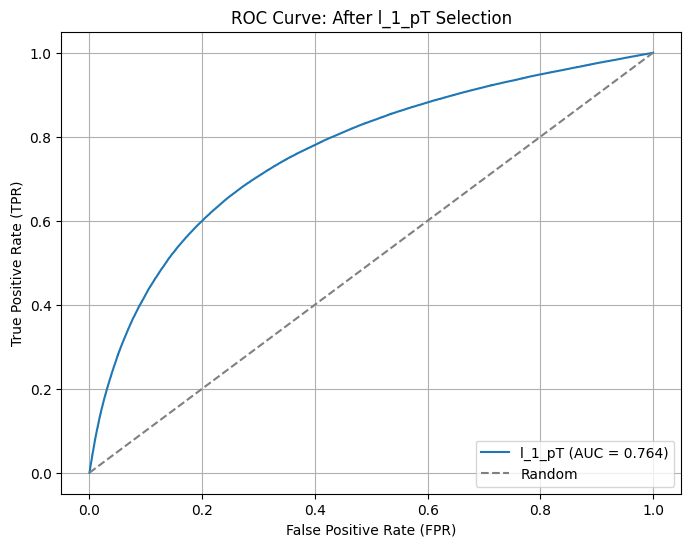

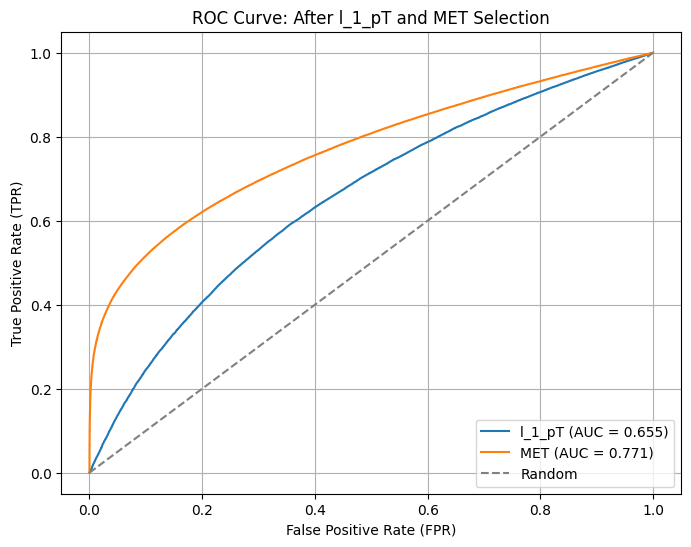

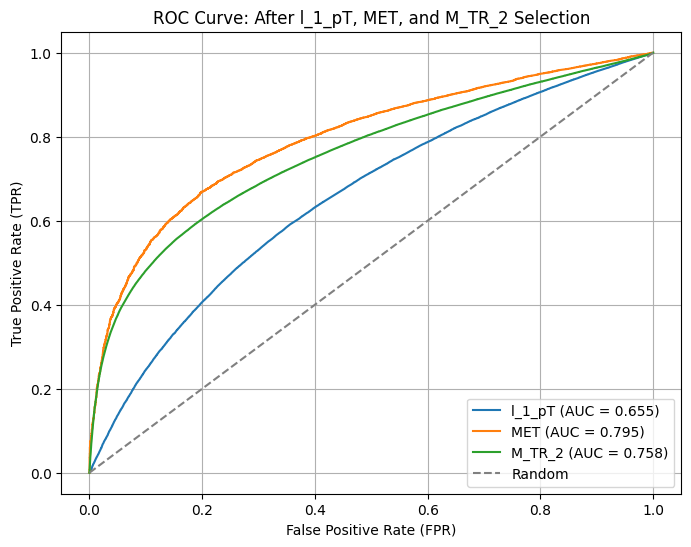

In [38]:
# Exercise 7.3

cuts = {
    "l_1_pT": 0.918,
    "MET": 1.531,
    "M_TR_2": 1.327
}

# Define conditions for successive selections
conditions_l1pT = {"l_1_pT": lambda df: df["l_1_pT"] > cuts["l_1_pT"]}
conditions_l1pT_MET = {
    "l_1_pT": lambda df: df["l_1_pT"] > cuts["l_1_pT"],
    "MET": lambda df: df["MET"] > cuts["MET"],
}
conditions_l1pT_MET_MTR2 = {
    "l_1_pT": lambda df: df["l_1_pT"] > cuts["l_1_pT"],
    "MET": lambda df: df["MET"] > cuts["MET"],
    "M_TR_2": lambda df: df["M_TR_2"] > cuts["M_TR_2"],
}

plot_roc_curves(df_sig, df_bkg, ["l_1_pT"], title="ROC Curve: After l_1_pT Selection")
plot_roc_curves(df_sig, df_bkg, ["l_1_pT", "MET"], conditions=conditions_l1pT, title="ROC Curve: After l_1_pT and MET Selection")
plot_roc_curves(df_sig, df_bkg, ["l_1_pT", "MET", "M_TR_2"], conditions=conditions_l1pT_MET, title="ROC Curve: After l_1_pT, MET, and M_TR_2 Selection")

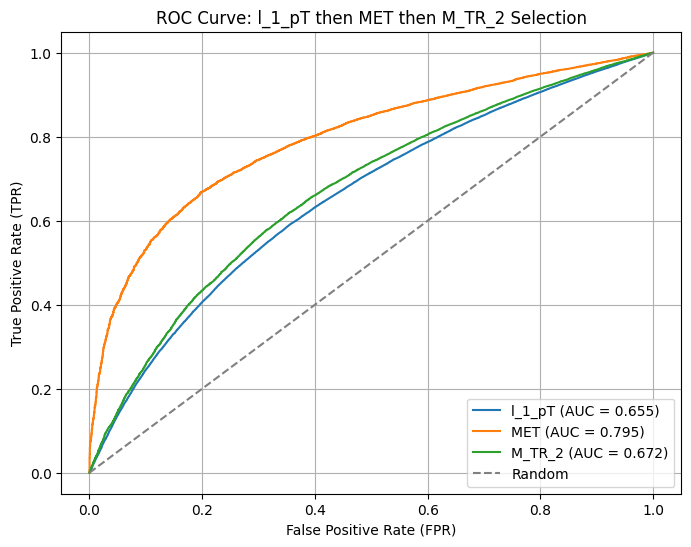

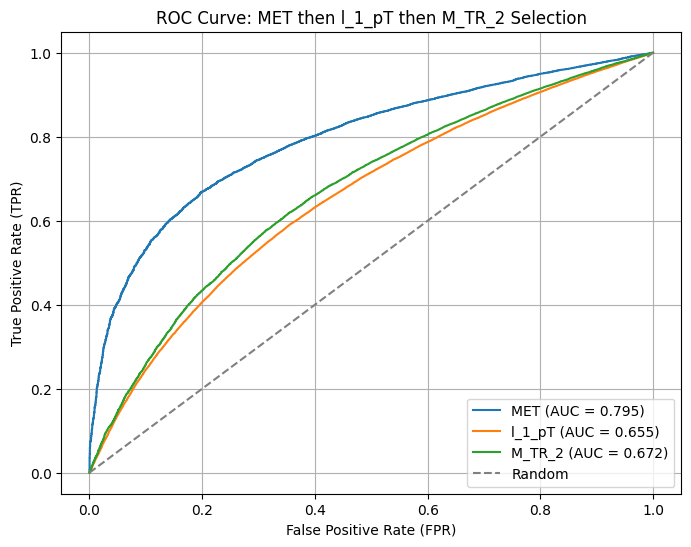

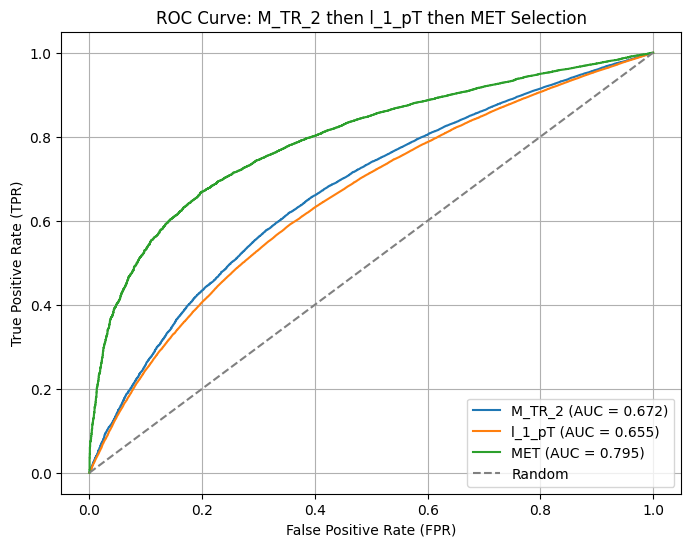

In [39]:
# Exercise 7.4

# Define conditions for different selection orders
conditions_l1pT_MET_MTR2 = {
    "l_1_pT": lambda df: df["l_1_pT"] > cuts["l_1_pT"],
    "MET": lambda df: df["MET"] > cuts["MET"],
    "M_TR_2": lambda df: df["M_TR_2"] > cuts["M_TR_2"],
}
conditions_MET_l1pT_MTR2 = {
    "MET": lambda df: df["MET"] > cuts["MET"],  # MET selection first
    "l_1_pT": lambda df: df["l_1_pT"] > cuts["l_1_pT"],
    "M_TR_2": lambda df: df["M_TR_2"] > cuts["M_TR_2"],
}
conditions_MTR2_l1pT_MET = {
    "M_TR_2": lambda df: df["M_TR_2"] > cuts["M_TR_2"],  # M_TR_2 selection first
    "l_1_pT": lambda df: df["l_1_pT"] > cuts["l_1_pT"],
    "MET": lambda df: df["MET"] > cuts["MET"],
}

plot_roc_curves(df_sig, df_bkg, ["l_1_pT", "MET", "M_TR_2"], conditions=conditions_l1pT_MET_MTR2, title="ROC Curve: l_1_pT then MET then M_TR_2 Selection")
plot_roc_curves(df_sig, df_bkg, ["MET", "l_1_pT", "M_TR_2"], conditions=conditions_MET_l1pT_MTR2, title="ROC Curve: MET then l_1_pT then M_TR_2 Selection")
plot_roc_curves(df_sig, df_bkg, ["M_TR_2", "l_1_pT", "MET"], conditions=conditions_MTR2_l1pT_MET, title="ROC Curve: M_TR_2 then l_1_pT then MET Selection")


## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [40]:
# Exercise 8.1 compute between class and within
import numpy as np

observables = ["l_1_pT", "MET", "M_TR_2"]

# Filter out rows with NaN values in the selected observables
df_sig_filtered = df_sig[observables].dropna()
df_bkg_filtered = df_bkg[observables].dropna()
df_filtered = df[observables].dropna()

# Within-class covariance (Sw)
m1 = df_sig_filtered.mean().values
m2 = df_bkg_filtered.mean().values
Sw = np.zeros((len(observables), len(observables)))

for i in range(len(df_sig_filtered)):
    xin = df_sig_filtered.iloc[i].values
    Sw += np.outer(xin - m1, xin - m1)
for i in range(len(df_bkg_filtered)):
    xin = df_bkg_filtered.iloc[i].values
    Sw += np.outer(xin - m2, xin - m2)
Sw /= (len(df_sig_filtered) + len(df_bkg_filtered))

# Between-class covariance (Sb)
m_overall = df_filtered.mean().values
Sb = np.outer(m1 - m_overall, m1 - m_overall) * len(df_sig_filtered) + \
     np.outer(m2 - m_overall, m2 - m_overall) * len(df_bkg_filtered)
Sb /= (len(df_sig_filtered) + len(df_bkg_filtered))

print("Within-class Covariance Matrix (Sw):\n", Sw)
print("\nBetween-class Covariance Matrix (Sb):\n", Sb)

Within-class Covariance Matrix (Sw):
 [[0.39598463 0.12578097 0.2210428 ]
 [0.12578097 0.61486038 0.27017336]
 [0.2210428  0.27017336 0.27656735]]

Between-class Covariance Matrix (Sb):
 [[0.07149636 0.10265291 0.06618011]
 [0.10265291 0.1473868  0.09501996]
 [0.06618011 0.09501996 0.06125916]]


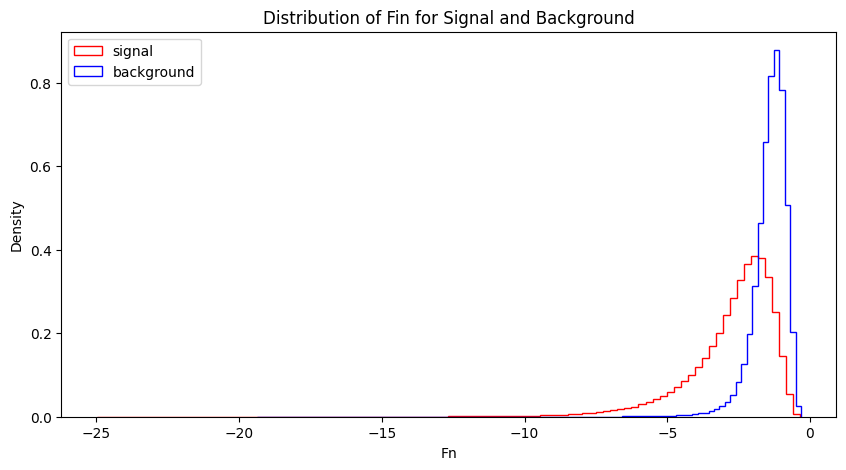

In [41]:
# Exercise 8.1 compute linear coefficients 
import numpy as np
Sw_inv = np.linalg.inv(Sw)  # Inverse of Sw
w = Sw_inv.dot(m2 - m1)  # Linear coefficients

# Calculate Fn for signal and background
Fn_sig = df_sig_filtered[observables].values.dot(w)
Fn_bkg = df_bkg_filtered[observables].values.dot(w)

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(Fn_sig, bins=100, histtype="step", color="red", label="signal", density=True)
plt.hist(Fn_bkg, bins=100, histtype="step", color="blue", label="background", density=True)
plt.xlabel("Fn")
plt.ylabel("Density")
plt.title("Distribution of Fin for Signal and Background")
plt.legend()
plt.show()

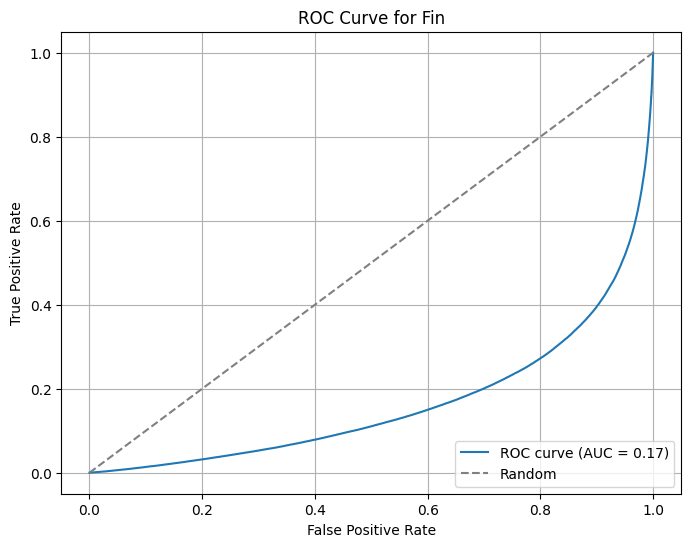

In [43]:
# Exercise 8.1 draw roc curve
from sklearn.metrics import roc_curve, auc

# Combine true labels and scores
y_true = np.concatenate([np.ones(len(Fn_sig)), np.zeros(len(Fn_bkg))])
y_scores = np.concatenate([Fn_sig, Fn_bkg])

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Fin")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [44]:
# Exercise 8.1 max significance

def calculate_significance(Ns, Nb, tpr, fpr):
    return (tpr * Ns) / np.sqrt(tpr * Ns + fpr * Nb + 1e-9) 

def calculate_tpr_fpr(df_sig, df_bkg, observable, strategy, xc):
  if strategy == ">":
      sig_selected = df_sig[df_sig[observable] > xc]
      bkg_selected = df_bkg[df_bkg[observable] > xc]
  elif strategy == "<":
      sig_selected = df_sig[df_sig[observable] < xc]
      bkg_selected = df_bkg[df_bkg[observable] < xc]
  elif strategy == "abs_diff":
      sig_mean = df_sig[observable].mean()
      sig_selected = df_sig[abs(df_sig[observable] - sig_mean) < xc]
      bkg_mean = df_bkg[observable].mean()
      bkg_selected = df_bkg[abs(df_bkg[observable] - bkg_mean) < xc]
  tpr = len(sig_selected) / len(df_sig)  # signal efficiency
  fpr = len(bkg_selected) / len(df_bkg)  # background efficiency
  return tpr, fpr


scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]
observables = ["l_1_pT", "MET", "M_TR_2", "MET_rel", "axial_MET","R", "MT2"]
strategy = ">"  
max_significance_values = {}  

for observable in observables:
    max_significance = 0  
    for Ns, Nb in scenarios:
        xc_range = np.linspace(df[observable].min(), df[observable].max(), 100)  # Range of cut values
        for xc in xc_range:
            tpr, fpr = calculate_tpr_fpr(df_sig, df_bkg, observable, strategy, xc)
            significance = calculate_significance(Ns, Nb, tpr, fpr)
            if significance > max_significance:
                max_significance = significance
    max_significance_values[observable] = max_significance

for observable, significance in max_significance_values.items():
    print(f"Maximal Significance for {observable}: {significance:.3f}")

Maximal Significance for l_1_pT: 37.191
Maximal Significance for MET: 47.375
Maximal Significance for M_TR_2: 40.091
Maximal Significance for MET_rel: 30.650
Maximal Significance for axial_MET: 34.337
Maximal Significance for R: 30.151
Maximal Significance for MT2: 24.525
